In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pip install nlpaug

In [ ]:
pip install -U scikit-learn


In [ ]:
pip install -U imbalanced-learn

In [ ]:
import pandas as pd                                                             # Importing all the libearies
import os
from PIL import Image
import matplotlib.pyplot as plt
import os
import tensorflow as tf
import numpy as np
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.style.use("seaborn")
import re
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('words')
stop_words = set(stopwords.words('english'))
from wordcloud import WordCloud
from collections import Counter
AUTOTUNE = tf.data.experimental.AUTOTUNE
import numpy as np
import pathlib
import shutil
import tempfile
from  IPython import display
from itertools import cycle
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import TensorBoard, EarlyStopping
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Embedding, GRU, LSTM, Bidirectional,Dropout,Flatten,Input,Concatenate
from tensorflow.keras.models import Sequential
from keras import backend as Ke
import nlpaug.augmenter.word as naw
from tensorflow.keras.regularizers import l1
from tensorflow.keras.optimizers import Adam
from imblearn.over_sampling import RandomOverSampler

In [ ]:
os.chdir("/content/drive/MyDrive/A2/StanceDataset")                             # Setting the path of the data

In [ ]:
encoding = "unicode_escape"                                                     # Loading the training Data by using encoding method
data_train= pd.read_csv('train.csv',\
                        sep=',',lineterminator='\r',encoding = encoding)

In [ ]:
t_test= pd.read_csv('test.csv',sep=',',lineterminator='\r',                     # Loading the Test data by using Encoding method
                       encoding = encoding)

# Exploratory Data Analysis (EDA)

In [ ]:
data_train.shape                                                                # Shape of the Training Data

(2914, 5)

In [ ]:
data_train.head()

Tweet           Target  \
0  @tedcruz And, #HandOverTheServer she wiped cle...  Hillary Clinton   
1  Hillary is our best choice if we truly want to...  Hillary Clinton   
2  @TheView I think our country is ready for a fe...  Hillary Clinton   
3  I just gave an unhealthy amount of my hard-ear...  Hillary Clinton   
4  @PortiaABoulger Thank you for adding me to you...  Hillary Clinton   

    Stance                                    Opinion Towards Sentiment  
0  AGAINST  1.  The tweet explicitly expresses opinion abo...       neg  
1    FAVOR  1.  The tweet explicitly expresses opinion abo...       pos  
2  AGAINST  1.  The tweet explicitly expresses opinion abo...       neg  
3  AGAINST  1.  The tweet explicitly expresses opinion abo...       neg  
4     NONE  3.  The tweet is not explicitly expressing opi...       pos

In [ ]:
data_train.isna().sum()                                                         # Checking the null values in the data

Tweet              0
Target             0
Stance             0
Opinion Towards    0
Sentiment          0
dtype: int64

In [ ]:
data_train["Target"].value_counts()                                             # Exploring distribution of training data target classes

Hillary Clinton                     689
Feminist Movement                   664
Legalization of Abortion            653
Atheism                             513
Climate Change is a Real Concern    395
Name: Target, dtype: int64

In [ ]:
data_train["Stance"].value_counts()                                             # Exploring distribution of training data Stance classes

AGAINST    1395
NONE        766
FAVOR       753
Name: Stance, dtype: int64

In [ ]:
t_test.head()

Tweet   Target   Stance  \
0  He who exalts himself shall      be humbled; a...  Atheism  AGAINST   
1  RT @prayerbullets: I remove Nehushtan -previou...  Atheism  AGAINST   
2  @Brainman365 @heidtjj @BenjaminLives I have so...  Atheism  AGAINST   
3  #God is utterly powerless without Human interv...  Atheism  AGAINST   
4  @David_Cameron   Miracles of #Multiculturalism...  Atheism  AGAINST   

                                     Opinion Towards Sentiment  
0  1.  The tweet explicitly expresses opinion abo...       pos  
1  1.  The tweet explicitly expresses opinion abo...     other  
2  1.  The tweet explicitly expresses opinion abo...       pos  
3  1.  The tweet explicitly expresses opinion abo...       neg  
4  2. The tweet does NOT expresses opinion about ...       neg

In [ ]:
t_test["Target"].value_counts()                                                 # Exploring distribution of test data target classes

Donald Trump                        707
Hillary Clinton                     295
Feminist Movement                   285
Legalization of Abortion            280
Atheism                             220
Climate Change is a Real Concern    169
Name: Target, dtype: int64

In [ ]:
t_test["Stance"].value_counts()                                                 # Exploring distribution of test data Stance classes

AGAINST    1014
NONE        490
FAVOR       452
Name: Stance, dtype: int64

In [ ]:
Train_Stance = data_train['Stance'].value_counts(normalize=True)                # counting parcentage wise count of Stances in training data
Train_Stance

AGAINST    0.478723
NONE       0.262869
FAVOR      0.258408
Name: Stance, dtype: float64

## Graph of Cateogorical Data
Data visualization to explore the data

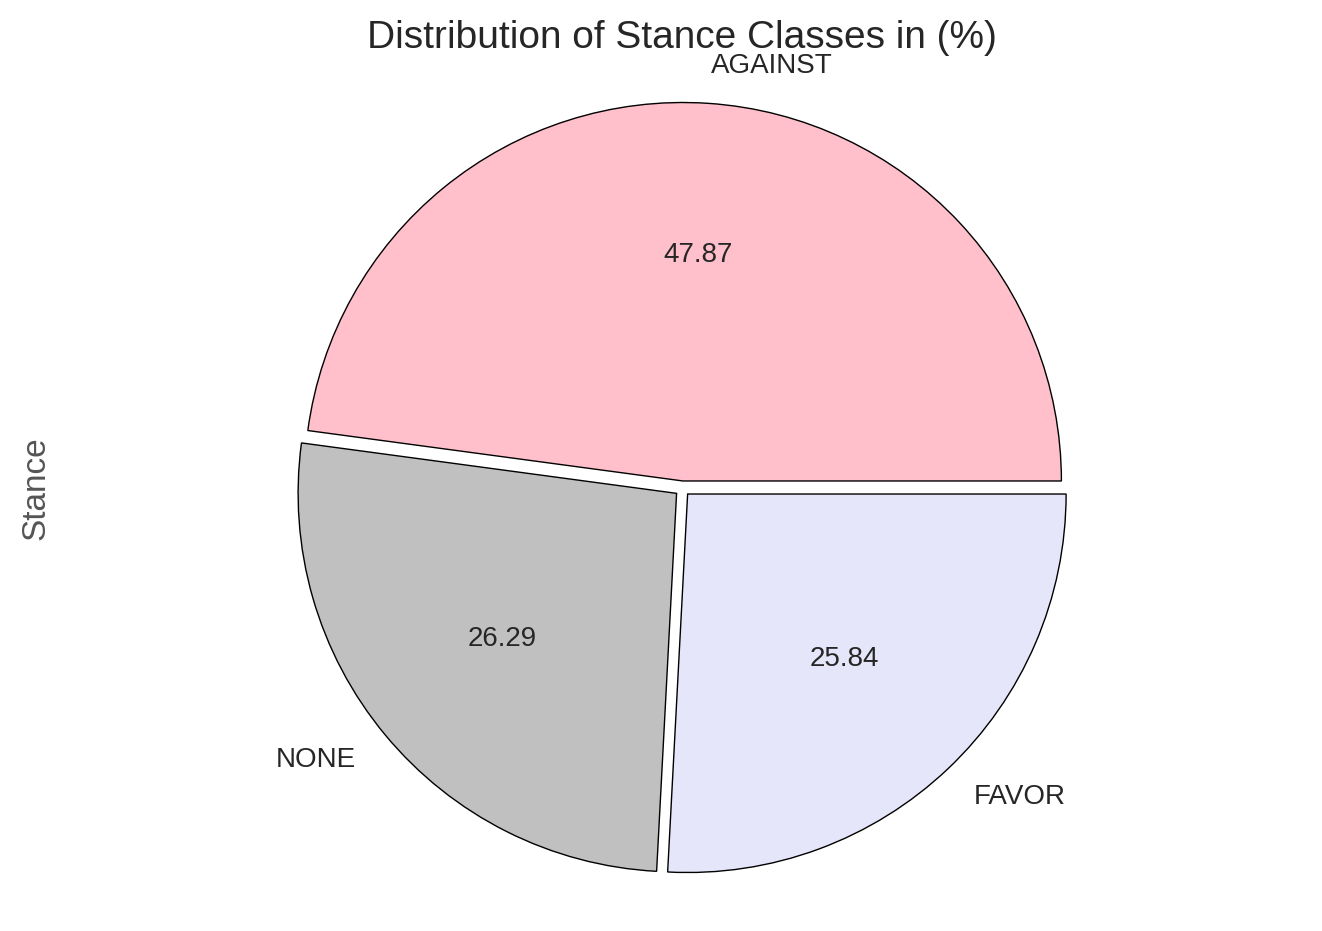

In [ ]:
plt.style.use('ggplot')                                                         # Set the plotting style to 'ggplot'

colors = ['pink', 'silver', "lavender"]                                         # Define the colors for the pie chart segments

# Define the labels for the pie chart segments
labels = ["AGAINST", "NONE", "FAVOR"]                                           # Define the labels for the pie chart segments

explode = (0.02, 0.02,0.02)
                                                                                # Create a pie chart for the Train_Stance data with percentage labels,
                                                                                # black edges, and custom colors
Train_Stance.plot(
    kind='pie',
    autopct='%.2f',
    wedgeprops={"edgecolor": "black"},
    colors=colors,
    explode = explode,
    labels=labels)
                                                                                # Set the title for the pie chart with an adjusted fontsize
plt.title("Distribution of Stance Classes in (%)", fontsize=14)
                                                                                # Ensure the pie chart is circular
plt.axis('equal')
                                                                                # Display the pie chart
plt.show()


In [ ]:
Target_class = data_train["Target"].value_counts()                              # Storing the distribution of target class in a variable to
                                                                                # using for graph

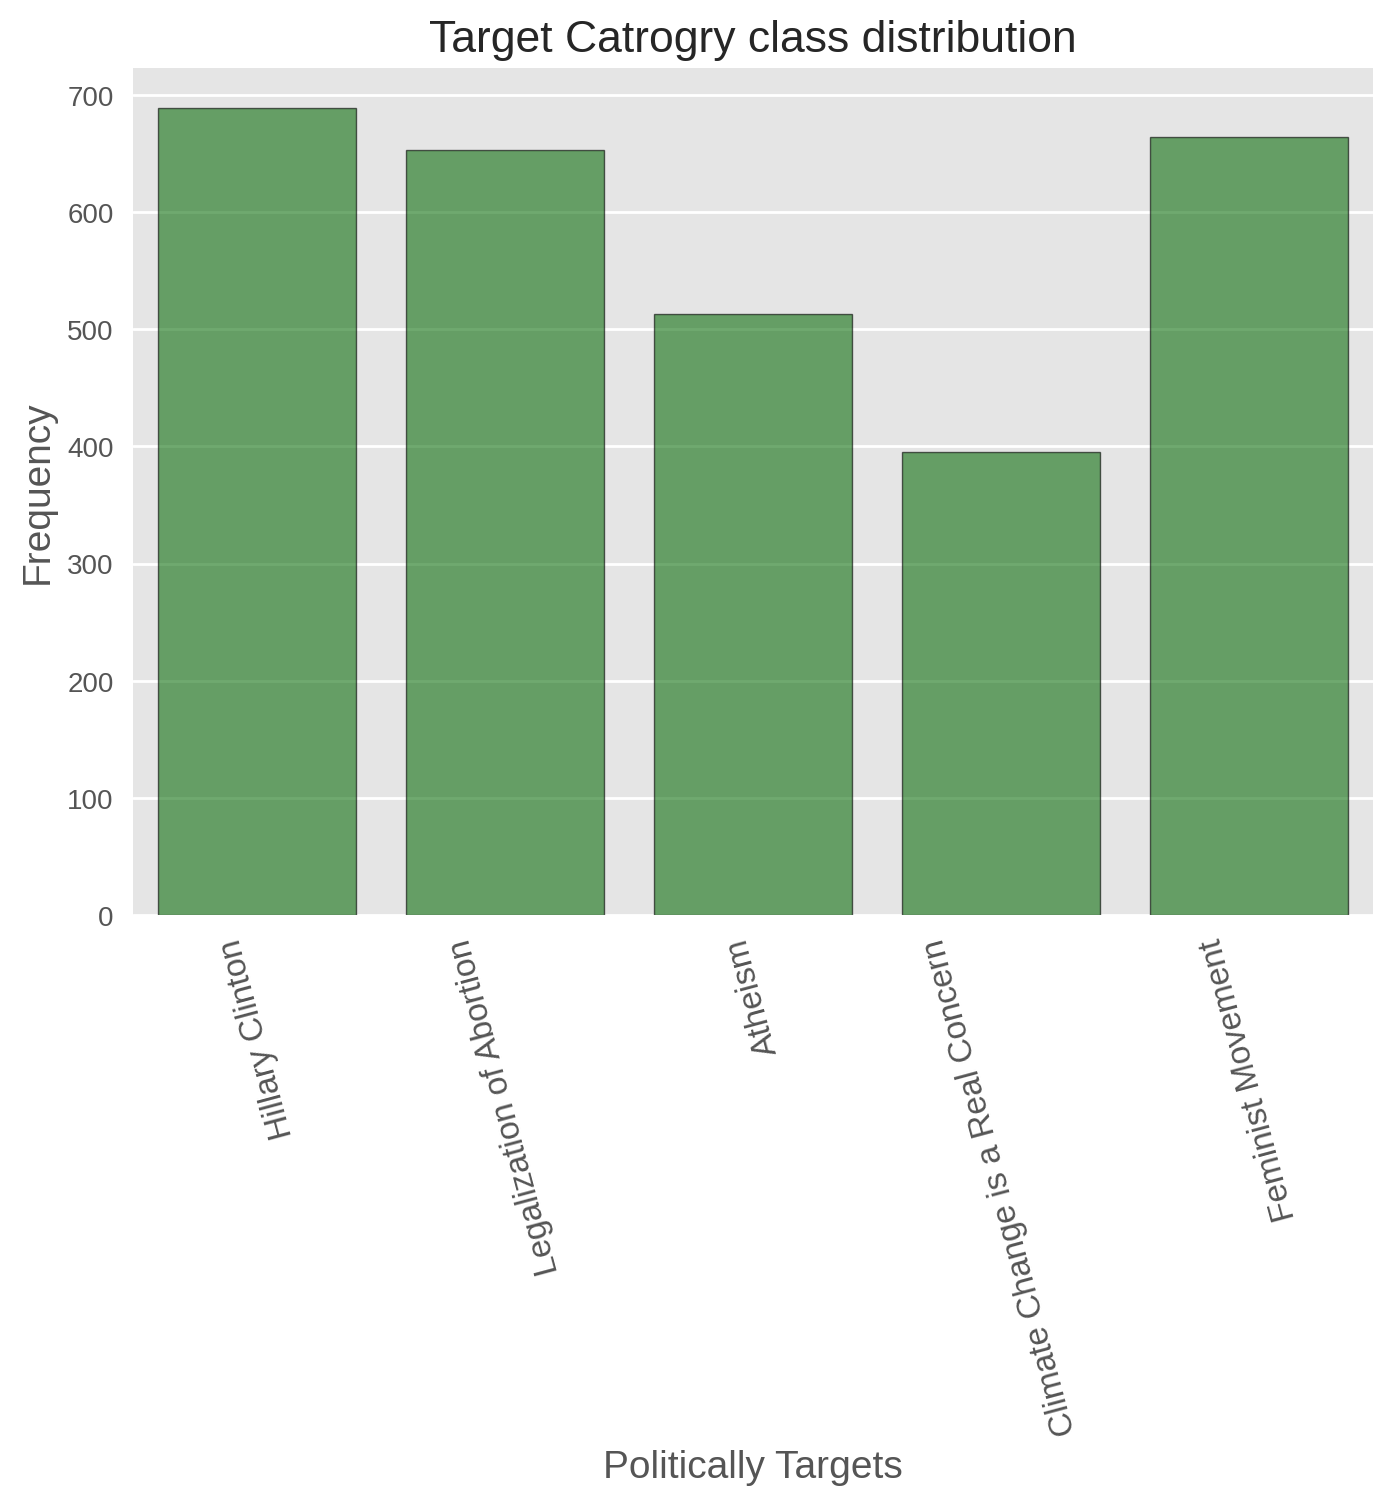

<Figure size 1000x600 with 0 Axes>

In [ ]:
plt.style.use('ggplot')                                                         # Set the plotting style

                                                                                # Create a countplot for the 'Target' column with
                                                                                # a single color for all bars
sns.countplot(x=data_train['Target'], color='green',
                      edgecolor='black', alpha=0.6)
                                                                                # Remove spines
sns.despine(top=True, right=True, bottom=True, left=True)
                                                                                # Set the title and labels
plt.title('Target Catrogry class distribution', fontsize=16)
plt.xlabel("Politically Targets", fontsize=14)
plt.ylabel('Frequency', fontsize=14)
                                                                                # Rotate x-axis labels at a 105-degree angle
plt.xticks(rotation=105, fontsize=12)
                                                                                # Increase the figure size
plt.figure(figsize=(10, 6))
                                                                                # Ensure a tight layout
plt.tight_layout()

plt.show()


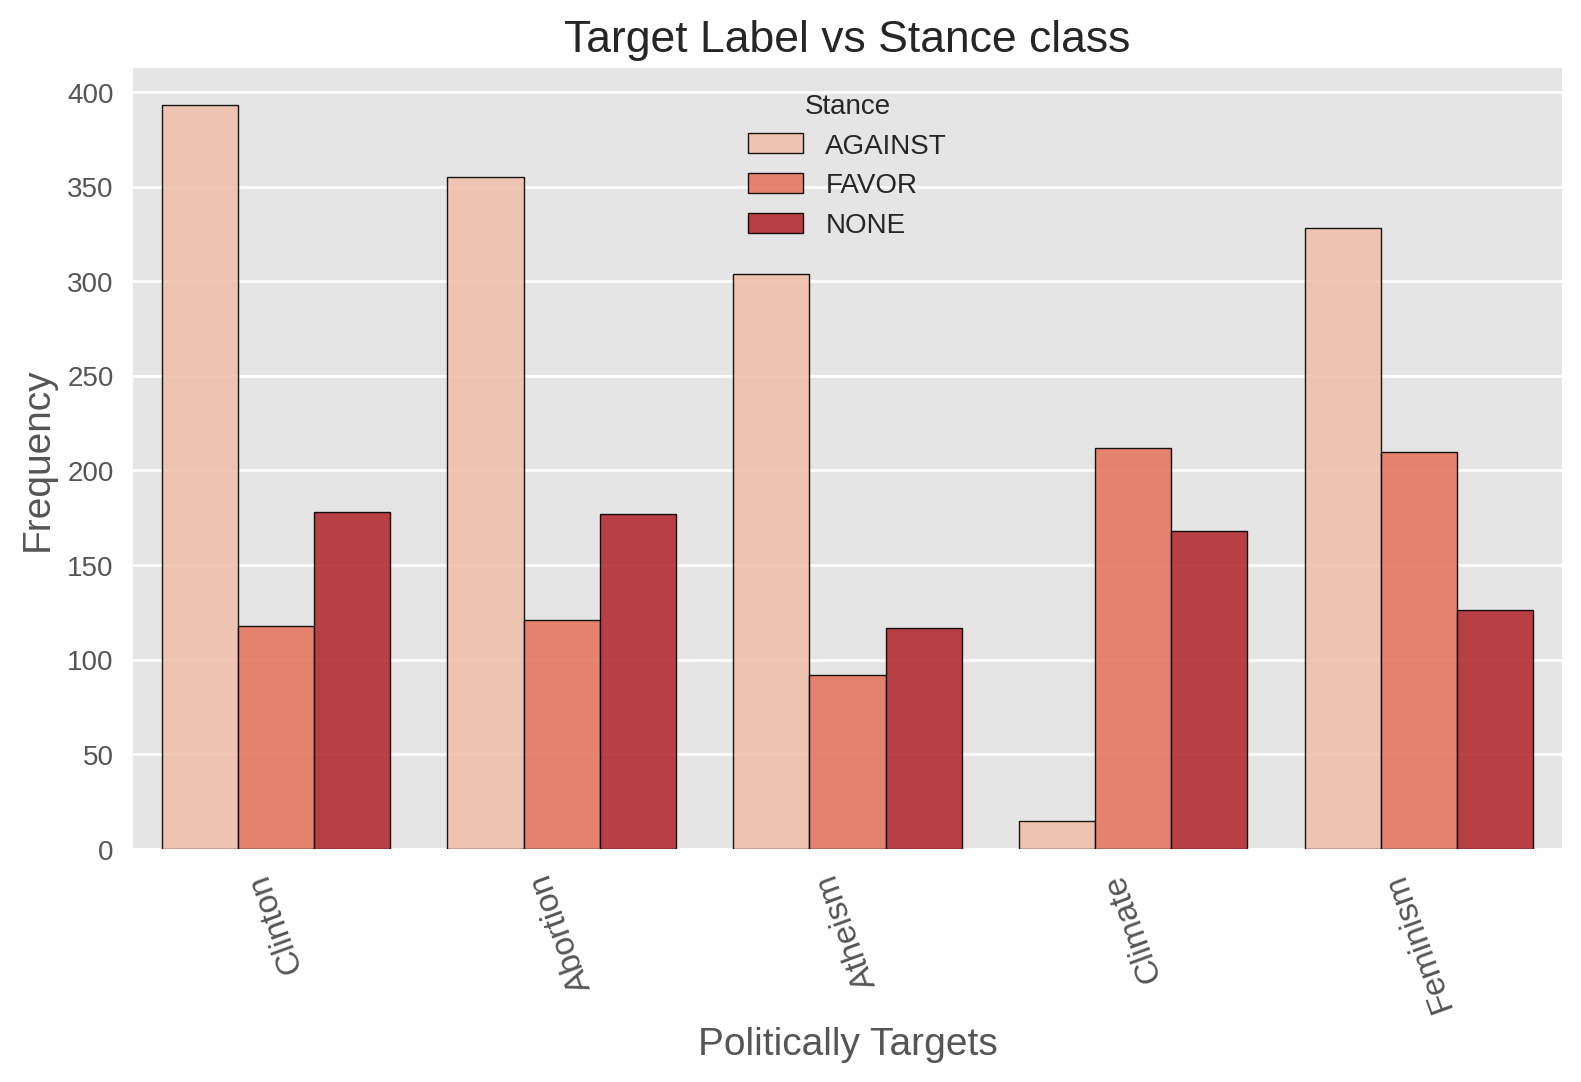

In [ ]:
plt.style.use('ggplot')
                                                                                # Create a grouped bar graph
sns.countplot(x='Target', hue='Stance', data=data_train , palette='Reds',
                                            edgecolor='black', alpha=0.9)

                                                                                # Remove spines
sns.despine(top=True, right=True, bottom=True, left=True)
                                                                                # Set the title and labels
plt.title('Target Label vs Stance class', fontsize=16)
plt.xlabel("Politically Targets", fontsize=14)
plt.ylabel('Frequency', fontsize=14)

                                                                                # Rotate x-axis labels at a 110-degree angle
plt.xticks(rotation=110, fontsize=12)
new_labels = ['Clinton', 'Abortion', 'Atheism', 'Climate',"Feminism"]
                                                                                # Replace with your custom labels
plt.xticks(ticks=range(len(new_labels)), labels=new_labels)

                                                                                # Ensure a tight layout
plt.tight_layout()

plt.show()

# Spporting Function for cleaning the tweets text

In [ ]:
                                                                                # Creating a function to preprocess the tweets
def preprocess_tweet(tweet):
                                                                                # Lowercase the tweet
    tweet = tweet.lower()
                                                                                # Remove hashtags and mention usernames
    tweet = re.sub(r'\#\w+', '', tweet)
    tweet = re.sub(r'\@\w+', '', tweet)

                                                                                # Remove punctuation from the tweets
    translator = str.maketrans(string.punctuation, ' ' * len(string.punctuation))
    tweet = tweet.translate(translator)

                                                                                # Remove digits from the tweets
    tweet = re.sub(r'\d', '', tweet)

                                                                                # Tokenize the tweet
    words = word_tokenize(tweet)
                                                                                # Remove stopwords and lemmatize
                                                                                # Removing 1 length word also from the tweets
    stop_words = set(stopwords.words('english'))
    lemmatizer = WordNetLemmatizer()
    cleaned_words = [lemmatizer.lemmatize(word) for word in words if word.lower() not in stop_words and len(word) > 1]

    return cleaned_words
                                                                                # Creating helping function to process the tweet data
def pre_processing(tweets):
    preprocessed_tweets = [preprocess_tweet(tweet) for tweet in tweets]
    return preprocessed_tweets


In [ ]:
tweets = data_train["Tweet"].to_list()                                          # Creating a list of lists of tweets

In [ ]:
Cleaned_tweet = pre_processing(tweets)                                          # Applying preprocess function on tweet list

In [ ]:
data_train["cleaned_tweets"] = Cleaned_tweet                                    # Creating a new column of cleaned tweets

In [ ]:
data_train.head(3)

Tweet           Target  \
0  @tedcruz And, #HandOverTheServer she wiped cle...  Hillary Clinton   
1  Hillary is our best choice if we truly want to...  Hillary Clinton   
2  @TheView I think our country is ready for a fe...  Hillary Clinton   

    Stance                                    Opinion Towards Sentiment  \
0  AGAINST  1.  The tweet explicitly expresses opinion abo...       neg   
1    FAVOR  1.  The tweet explicitly expresses opinion abo...       pos   
2  AGAINST  1.  The tweet explicitly expresses opinion abo...       neg   

                                      cleaned_tweets  
0  [wiped, clean, deleted, email, explains, derel...  
1  [hillary, best, choice, truly, want, continue,...  
2  [think, country, ready, female, pres, ever, hi...

### Creating Word Cloud of Tweet Text Data

In [ ]:
                                                                                # Filtering the data on the basis of Target class
                                                                                # For creating word cloud for each class and visualize the common words
Hillary_Clinton = data_train[data_train["Target"]=="Hillary Clinton"]
Feminist_Movement = data_train[data_train["Target"]=="Feminist Movement"]
Legalization_of_Abortion = data_train[data_train["Target"]=="Legalization of Abortion"]
Atheism = data_train[data_train["Target"]=="Atheism"]
Climate_Change = data_train[data_train["Target"]=="Climate Change is a Real Concern"]

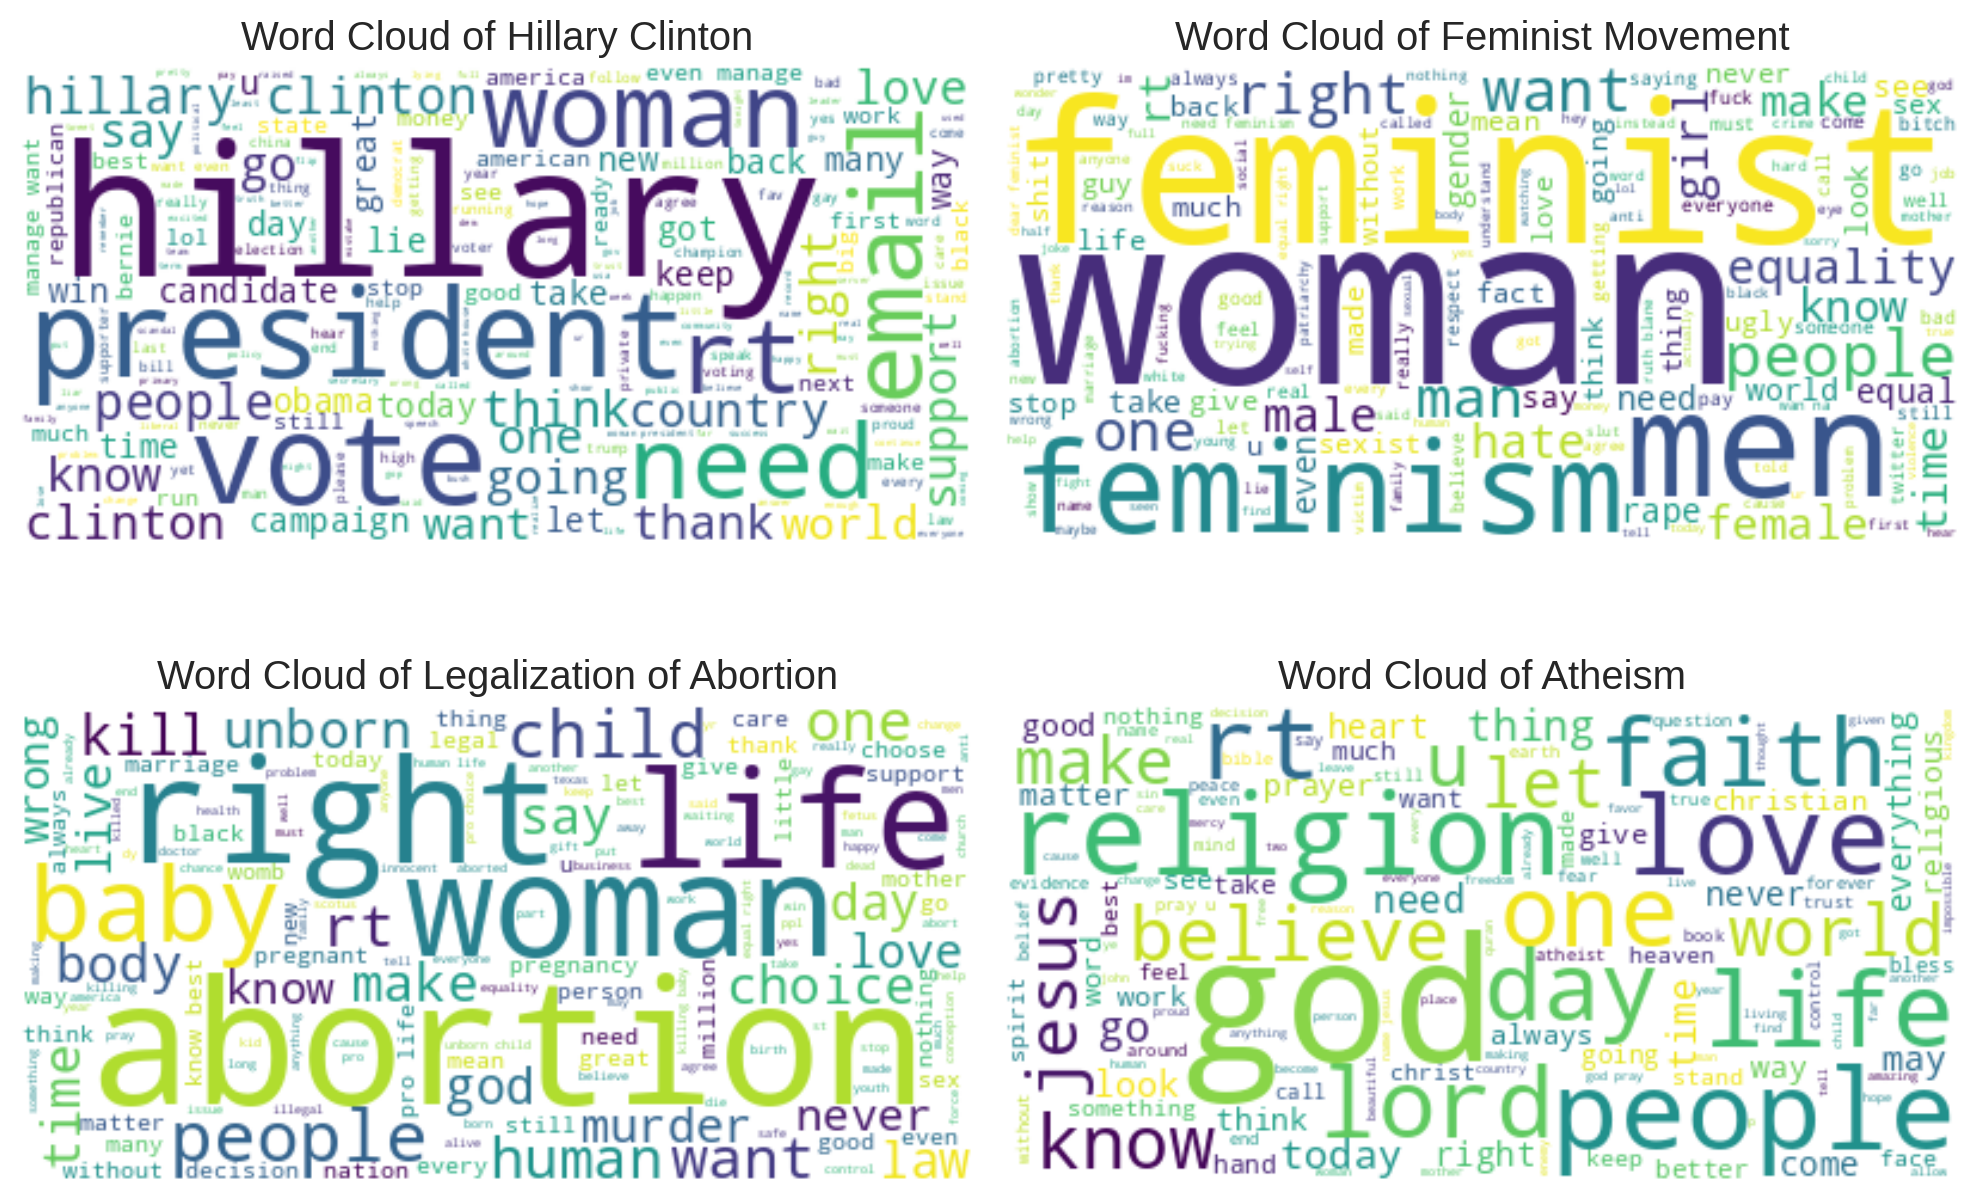

In [ ]:
                                                                                # Function to process the data for subplots
def word_cloud_plotter(ax, list_of_text, title):
    sentance_of_list = [' '.join(tokens) for tokens in list_of_text]            # Joining the tweet token into a sentance list
    combined_text = ' '.join(sentance_of_list)
    wordcloud = WordCloud(width=400, height=200, background_color='white', colormap='viridis')

                                                                                # Generate the word cloud
    wordcloud.generate(combined_text)
                                                                                # Display the word cloud as a subplot
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.axis("off")
    ax.set_title(f"Word Cloud of {title}")
                                                                                # Create a figure with subplots
fig, axes = plt.subplots(2, 2, figsize=(10, 7))
                                                                                # Plot word clouds for each category
word_cloud_plotter(axes[0, 0], Hillary_Clinton["cleaned_tweets"], "Hillary Clinton")
word_cloud_plotter(axes[0, 1], Feminist_Movement["cleaned_tweets"], "Feminist Movement")
word_cloud_plotter(axes[1, 0], Legalization_of_Abortion["cleaned_tweets"], "Legalization of Abortion")
word_cloud_plotter(axes[1, 1], Atheism["cleaned_tweets"], "Atheism")

                                                                                # Adjust spacing and display the subplots
plt.tight_layout()
plt.show()

In [ ]:
counter = Counter(Cleaned_tweet[0])                                             # Create a Counter object to count the occurrences of tokens

                                                                                # Iterate through the cleaned tweets and update the counter
for i in Cleaned_tweet[1:]:
    counter.update(i)
                                                                                # Taking the top 50 most frequent words from all tweets
most_fw_50 = counter.most_common(50)
                                                                                # Extracting the words from the data not the number of occurance
most_50_fw= [token[0] for token in most_fw_50]

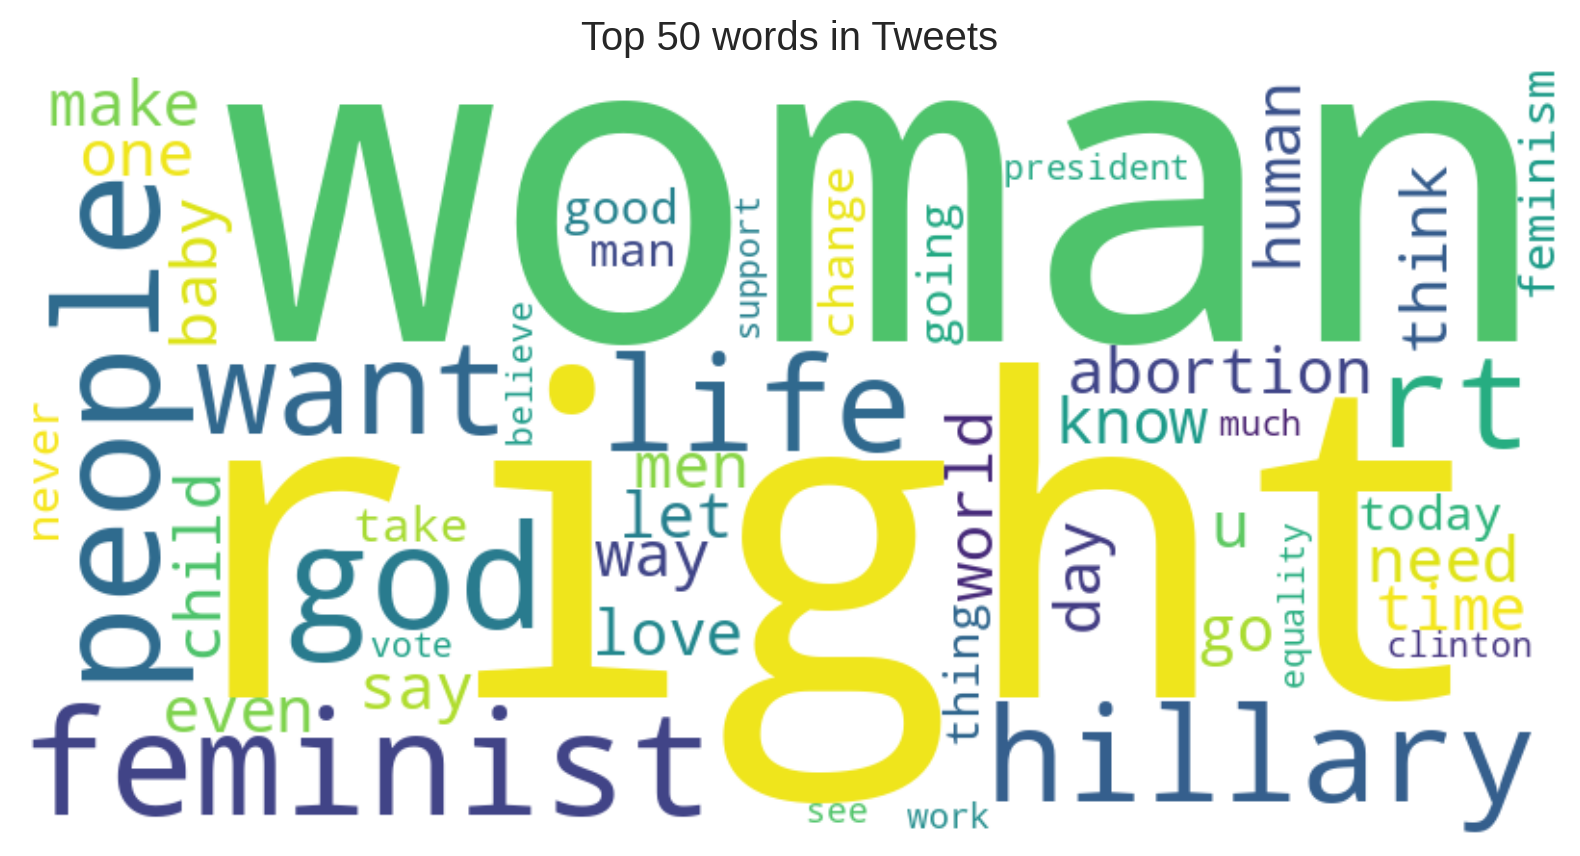

In [ ]:
                                                                                # Creating a sentance of all the words
text = ' '.join(most_50_fw)
                                                                                # Generate the word cloud

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Top 50 words in Tweets")
plt.show()

In [ ]:
logdir = pathlib.Path(tempfile.mkdtemp())/"tensorboard_logs"
shutil.rmtree(logdir, ignore_errors=True)

                                                                                # Load the TensorBoard notebook extension
%load_ext tensorboard

                                                                                # Open an embedded TensorBoard viewer
%tensorboard --logdir {logdir}/models

<IPython.core.display.Javascript object>

In [ ]:
                                                                                # Creating a spporting function for ploting the learning curve
def plotter(history_hold, metric = 'binary_crossentropy', ylim=[0.0, 1.0]):
                                                                                # Create a color cycling iterator

  cycol = cycle('bgrcmk')
                                                                                # Iterate through the items in 'history_hold'
  for name, item in history_hold.items():
    y_train = item.history[metric]
    y_val = item.history['val_' + metric]
    x_train = np.arange(0,len(y_val))

    c=next(cycol)
                                                                                # Plot the training history with a line and label it
    plt.plot(x_train, y_train, c+'-', label=name+'_train')
                                                                                # Plot the validation history with a dashed line and label it
    plt.plot(x_train, y_val, c+'--', label=name+'_val')

  plt.legend()
  plt.xlim([1, max(plt.xlim())])
  plt.ylim(ylim)
                                                                                # Set labels for the x-axis and y-axis
  plt.xlabel('Epoch')
  plt.ylabel(metric)
                                                                                # Add a grid to the plot
  plt.grid(True)

Converting category class into numerical categories by using map function

In [ ]:
target_mapping = {                                                              # Creating a dictionary to convert target into numerical values

    'Hillary Clinton': 0,
    'Feminist Movement': 1,
    'Legalization of Abortion': 2,
    'Atheism': 3,
    'Climate Change is a Real Concern': 4
}

In [ ]:
data_train['Target'] = data_train['Target'].map(target_mapping)                 # Performing mapping on target column

In [ ]:
stance_mapping = {                                                              #Creating a dictionary to convert Stance into numerical values
    'AGAINST':0,
    "NONE":1,
    "FAVOR":2
}

In [ ]:
data_train["Stance"] = data_train["Stance"].map(stance_mapping)                 # Performing mapping on Stance column

In [ ]:
data_train["Stance"].value_counts()

0    1395
1     766
2     753
Name: Stance, dtype: int64

## Creating dictionary of Word Index and mapping with numeric representation of tweet

In [ ]:
tweet_max_length = 45
def indexing_padding(tweets):                                                   # Function that takes the list of cleaned tweets
                                                                                # Processing the tweet to numeric representation
  tweet_max_length = 45

  object_tokenizer = Tokenizer()                                                # Defining Tokenizer object

                                                                                # Processing the list of tweets
  object_tokenizer.fit_on_texts(tweets)
  tweet_seq = object_tokenizer.texts_to_sequences(tweets)
                                                                                # Creating a dictionary of word_index
  word_index = object_tokenizer.word_index

  print("unique tokens of tweets - "+str(len(word_index)))                      # Printing the length of word indexs

  vocab_size = len(object_tokenizer.word_index) + 1                             # Printing the length of unique word
  print('vocab_size of tweets - '+str(vocab_size))
                                                                                # doing the length of every tweet equal by using padding method
  tweets_pad = pad_sequences(tweet_seq, maxlen=tweet_max_length, padding='post')

  return word_index, vocab_size, tweets_pad


In [ ]:
preprocessed =indexing_padding(Cleaned_tweet)                                   # implimenting  word indexing and Padding on cleaned tweets

unique tokens of tweets - 5620
vocab_size of tweets - 5621


In [ ]:
TL_word_index = preprocessed[0]
TL_tweets_pad = preprocessed[2]
TL_vocab_size = preprocessed[1]

In [ ]:
data_train["tweets_pads"] = TL_tweets_pad.tolist()                                 # Creating new columns by using list of numeric representation of
                                                                                # tweets

In [ ]:
data_train.head(3)

Tweet  Target  Stance  \
0  @tedcruz And, #HandOverTheServer she wiped cle...       0       0   
1  Hillary is our best choice if we truly want to...       0       2   
2  @TheView I think our country is ready for a fe...       0       0   

                                     Opinion Towards Sentiment  \
0  1.  The tweet explicitly expresses opinion abo...       neg   
1  1.  The tweet explicitly expresses opinion abo...       pos   
2  1.  The tweet explicitly expresses opinion abo...       neg   

                                      cleaned_tweets  \
0  [wiped, clean, deleted, email, explains, derel...   
1  [hillary, best, choice, truly, want, continue,...   
2  [think, country, ready, female, pres, ever, hi...   

                                         tweets_pads  
0  [2497, 1153, 751, 118, 1583, 2498, 752, 112, 4...  
1  [6, 54, 65, 427, 9, 317, 626, 154, 0, 0, 0, 0,...  
2  [25, 78, 173, 113, 1584, 99, 6, 0, 0, 0, 0, 0,...

In [ ]:
train_df, val_df = train_test_split(
    data_train,
    test_size=0.20,                                                             # Adjust the proportion for validation
    stratify=data_train['Target'],                                              # Specify the target column to maintain distribution
    random_state=42                                                             # Set a random seed for reproducibility
)

In [ ]:
len(train_df)

2331

<ipython-input-45-41e2e89fc542>:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df1_grouped = train_df.groupby('Target').sum()
<ipython-input-45-41e2e89fc542>:9: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df2_grouped = val_df.groupby('Target').sum()


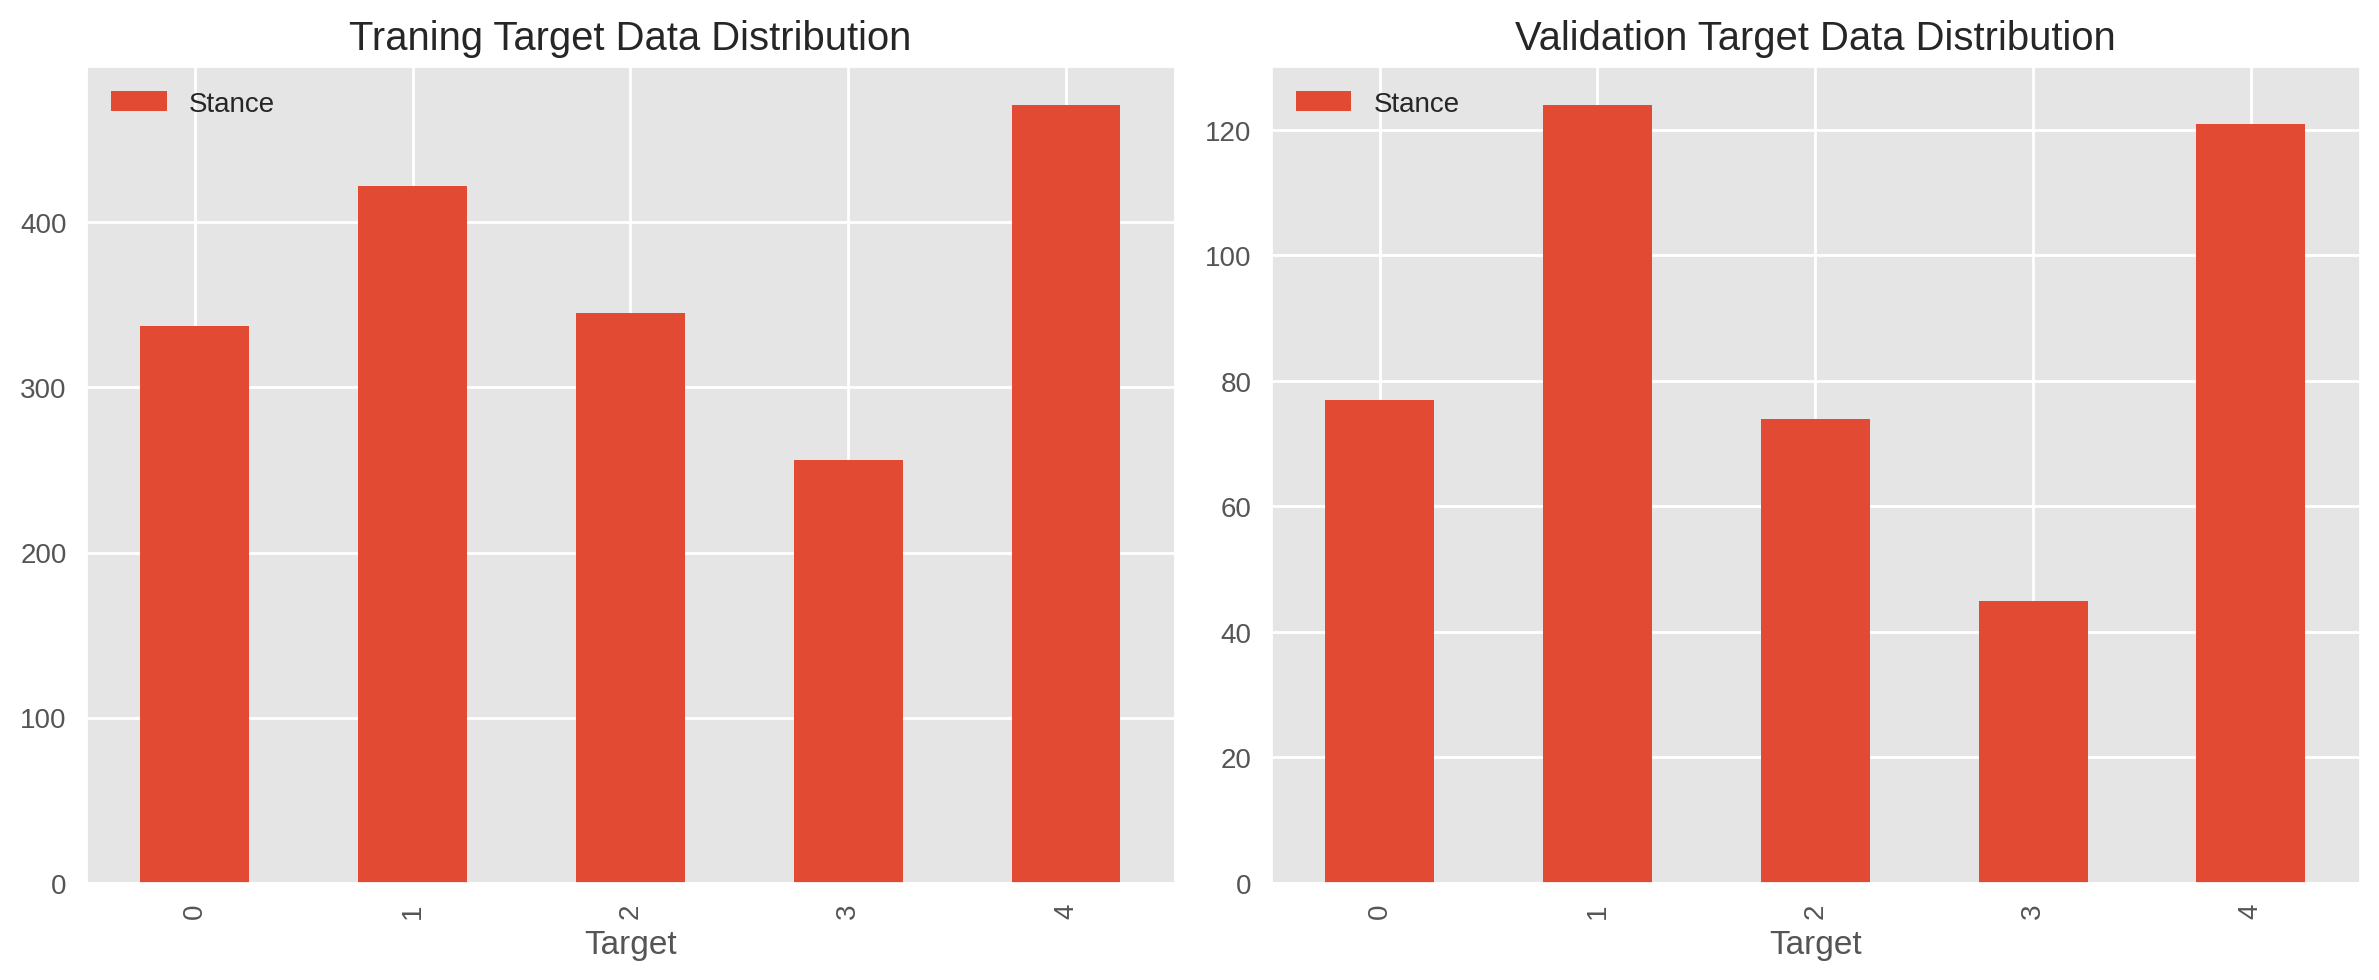

In [ ]:
                                                                                # Visualize the distribution of target column in train and validation data
fig, axes = plt.subplots(1, 2, figsize=(12, 5))


df1_grouped = train_df.groupby('Target').sum()
df1_grouped.plot(kind='bar', ax=axes[0], title='Traning Target Data Distribution')


df2_grouped = val_df.groupby('Target').sum()
df2_grouped.plot(kind='bar', ax=axes[1], title='Validation Target Data Distribution')


plt.tight_layout()

                                                                                # Show the plots
plt.show()


In [ ]:
                                                                                # Preparing the Training Data for model input
                                                                                # Creating a numpy array from the tweet_pads column in training data

training_tweet = np.array(train_df["tweets_pads"].values.tolist(), dtype=np.int32)

                                                                                # Creating One hot encoding for Target and stance column in training data
training_target_category = train_df["Target"].values
training_stance_cateogory = train_df["Stance"].values

target_values = np.max(training_target_category) + 1

target_train = np.eye(target_values)[training_target_category]

stance_values = np.max(training_stance_cateogory) + 1

Y_train = np.eye(stance_values)[training_stance_cateogory]

                                                                                # Preparing the validation Data for model input

val_tweet = np.array(val_df["tweets_pads"].values.tolist(), dtype=np.int32)

val_target_category = val_df["Target"].values                                   # Creating One hot encoding for Target and stance column in validation data
val_stance_cateogory = val_df["Stance"].values

target_values_val = np.max(val_target_category) + 1

target_val = np.eye(target_values_val)[val_target_category]

stance_values_test = np.max(val_stance_cateogory) + 1

Y_val = np.eye(stance_values_test)[val_stance_cateogory]

In [ ]:
print('Shape of X_train:', training_tweet.shape)
print('Shape of target_train:', target_train.shape)                             # Printing the shape of training Data
print('Shape of Y_train:', Y_train.shape,"\n")

print('Shape of X_train_val:', val_tweet.shape)
print('Shape of target_train_val:', target_val.shape)                           # Printing the shape of validation Data
print('Shape of Y_train_val:', Y_val.shape)

Shape of X_train: (2331, 45)
Shape of target_train: (2331, 5)
Shape of Y_train: (2331, 3) 

Shape of X_train_val: (583, 45)
Shape of target_train_val: (583, 5)
Shape of Y_train_val: (583, 3)


In [ ]:
def get_callbacks(name):                                                        # Define EarlyStopping function to stop the model if there is no impovement
    tensorboard_callback = TensorBoard(log_dir=name, histogram_freq=1)
    early_stopping = EarlyStopping(
        monitor='val_loss',                                                     # Monitor validation loss
        patience=17,                                                            # Number of epochs with no improvement before stopping
        restore_best_weights=True                                               # Restore the best model weights
    )
    return [tensorboard_callback, early_stopping]

In [ ]:
def f1_Score(y_true, y_pred):                                                   # Creating a function to calculate the f1 Score

                                                                                # Calculate true positives, false positives, and false negatives
    tp = Ke.sum(Ke.round(Ke.clip(y_true * y_pred, 0, 1)))
    fp = Ke.sum(Ke.round(Ke.clip(y_pred - y_true, 0, 1)))
    fn = Ke.sum(Ke.round(Ke.clip(y_true - y_pred, 0, 1)))

                                                                                # Calculate precision and recall with smoothing to avoid division by zero
    precision = tp / (tp + fp + Ke.epsilon())
    recall = tp / (tp + fn + Ke.epsilon())

                                                                                # Calculate F1 score with smoothing
    f1 = 2 * (precision * recall) / (precision + recall + Ke.epsilon())

    return f1


In [ ]:
num_targets = 5                                                                 # Defining total number of target class
num_stance_classes = 3                                                          # Defining total number of Stance Class                                                         #
batch_size = 32                                                                 # Defining total number of batch size

# Base Model with Glove Word Embaddings

In [ ]:
file = open('/content/drive/MyDrive/Data /glove.twitter.27B.50d.txt',           # Loading the text word embadding from a text file
            encoding='utf-8')

glove_vectors = dict()                                                          # Creating a dictionary to store the word weights
for line in file:
  values = line.split()
  word = values[0]
  features = np.asarray(values[1:])
  glove_vectors[word] = features                                                # Store word as a key and weights as a value of dictionary

file.close()

In [ ]:
embedding_dim = 50                                                              # Defining the dim of embaddings
m_histories = {}                                                                # Creating a empty dictionary to store the loss and f1 score while training

In [ ]:
                                                                                # Extracting word embadding representation
TL_E_T = np.zeros((len(TL_word_index) + 1, embedding_dim))
for word, i in TL_word_index.items():                                              # By using word index dictionary of the tweet vocabilary
    embedding_vector = glove_vectors.get(word)
    if embedding_vector is not None:
        TL_E_T[i] = embedding_vector                                               # Storing the extracted word embaddings

In [ ]:
def model(tweet_input_shape, target_input_shape, num_stance_classes, word_index,E_T):           # Creating a function to create the RNN model

    tweet_input = Input(shape=tweet_input_shape, name='tweet_input')
    target_input = Input(shape=target_input_shape, name='target_input')

                                                                                # Embedding layer for tweet text
    embedding_dim = 50
                                                                                # Creating an embedding layer for the tweet text with
                                                                                # pre-trained word vectors
    print()
    tweet_embedding_layer_TL = Embedding(len(word_index) + 1,
                                          embedding_dim,
                                          weights=[E_T],
                                          input_length=tweet_max_length,
                                          trainable=False)(tweet_input)

                                                                                # LSTM layer for tweet text
                                                                                # Using Bidirectional LSTM for better context understanding
    lstm_output = Bidirectional(LSTM(units=128,dropout=0.4,
                               recurrent_dropout=0.4))(tweet_embedding_layer_TL)

                                                                                # Concatenate LSTM output and target input
    merged_input = Concatenate()([lstm_output, target_input])

                                                                                # Addiing a flatten layer
    merged_input = Flatten()(merged_input)
    merged_input = Dense(256, activation='relu')(merged_input)                  # Adding a Dense layer in the model with relu activation function
    merged_input = Dropout(0.4)(merged_input)                                   # Adding Dropout layer


    output = Dense(num_stance_classes, activation='softmax',                    # Output layer with softmax activation for stance classification
                   name='stance_output')(merged_input)

    model = Model(inputs=[tweet_input, target_input], outputs=output)           # Create the model with defined inputs and outputs

    return model

In [ ]:
tweet_input_shape = (tweet_max_length,)                                         # Defining the Shape of input data
target_input_shape = (num_targets,)
stance_output_shape = (num_stance_classes,)
                                                                                # Create the base model instance
model_TL = model(tweet_input_shape, target_input_shape, num_stance_classes,TL_word_index,TL_E_T)

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 tweet_input (InputLayer)    [(None, 45)]                 0         []                            
                                                                                                  
 embedding (Embedding)       (None, 45, 50)               281050    ['tweet_input[0][0]']         
                                                                                                  
 bidirectional (Bidirection  (None, 256)                  183296    ['embedding[0][0]']           
 al)                                                                                              
                                                                                                  
 target_input (InputLayer)   [(None, 5)]                  0         []                        

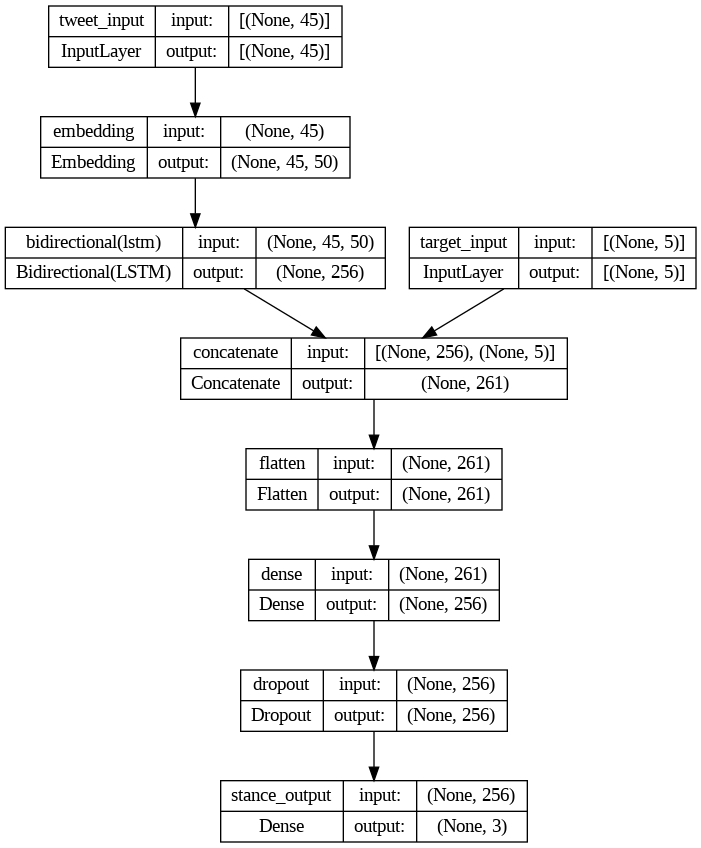

In [ ]:
model_TL.summary()                                                              # Printing Model summary and plot of Model Layers
tf.keras.utils.plot_model(model_TL, show_shapes=True, show_layer_names=True)

In [ ]:
model_TL.compile(optimizer='adam', loss='categorical_crossentropy',             # Compiling the model with adam optimizer and
                 metrics= ['categorical_accuracy', f1_Score])                   # Other loss and metrics function

In [ ]:
m_histories['TL'] = model_TL.fit(
    [training_tweet, target_train],                                             # Input data: tweets and target
    Y_train,                                                                    # Prediction data: stance labels
    epochs=40,                                                                  # Defining Epochs
    batch_size=32,                                                              # Defining batch size
    validation_data=([val_tweet, target_val], Y_val),                           # Validation data
    callbacks=get_callbacks('models/TL'),
    verbose=1
)

Epoch 1/40
73/73 [==============================] - 37s 297ms/step - loss: 1.0102 - categorical_accuracy: 0.5088 - f1_Score: 0.3163 - val_loss: 0.9246 - val_categorical_accuracy: 0.5866 - val_f1_Score: 0.4225
Epoch 2/40
73/73 [==============================] - 18s 243ms/step - loss: 0.9275 - categorical_accuracy: 0.5697 - f1_Score: 0.4566 - val_loss: 0.8939 - val_categorical_accuracy: 0.5712 - val_f1_Score: 0.4547
Epoch 3/40
73/73 [==============================] - 18s 243ms/step - loss: 0.9069 - categorical_accuracy: 0.5697 - f1_Score: 0.4949 - val_loss: 0.8755 - val_categorical_accuracy: 0.5952 - val_f1_Score: 0.5556
Epoch 4/40
73/73 [==============================] - 18s 243ms/step - loss: 0.8841 - categorical_accuracy: 0.5796 - f1_Score: 0.5215 - val_loss: 0.8761 - val_categorical_accuracy: 0.5952 - val_f1_Score: 0.5516
Epoch 5/40
73/73 [==============================] - 20s 272ms/step - loss: 0.8611 - categorical_accuracy: 0.5869 - f1_Score: 0.5391 - val_loss: 0.8631 - val_categor

**TL_train,TL_val**: The Model is trained without regularization only GloVe Word Embaddings

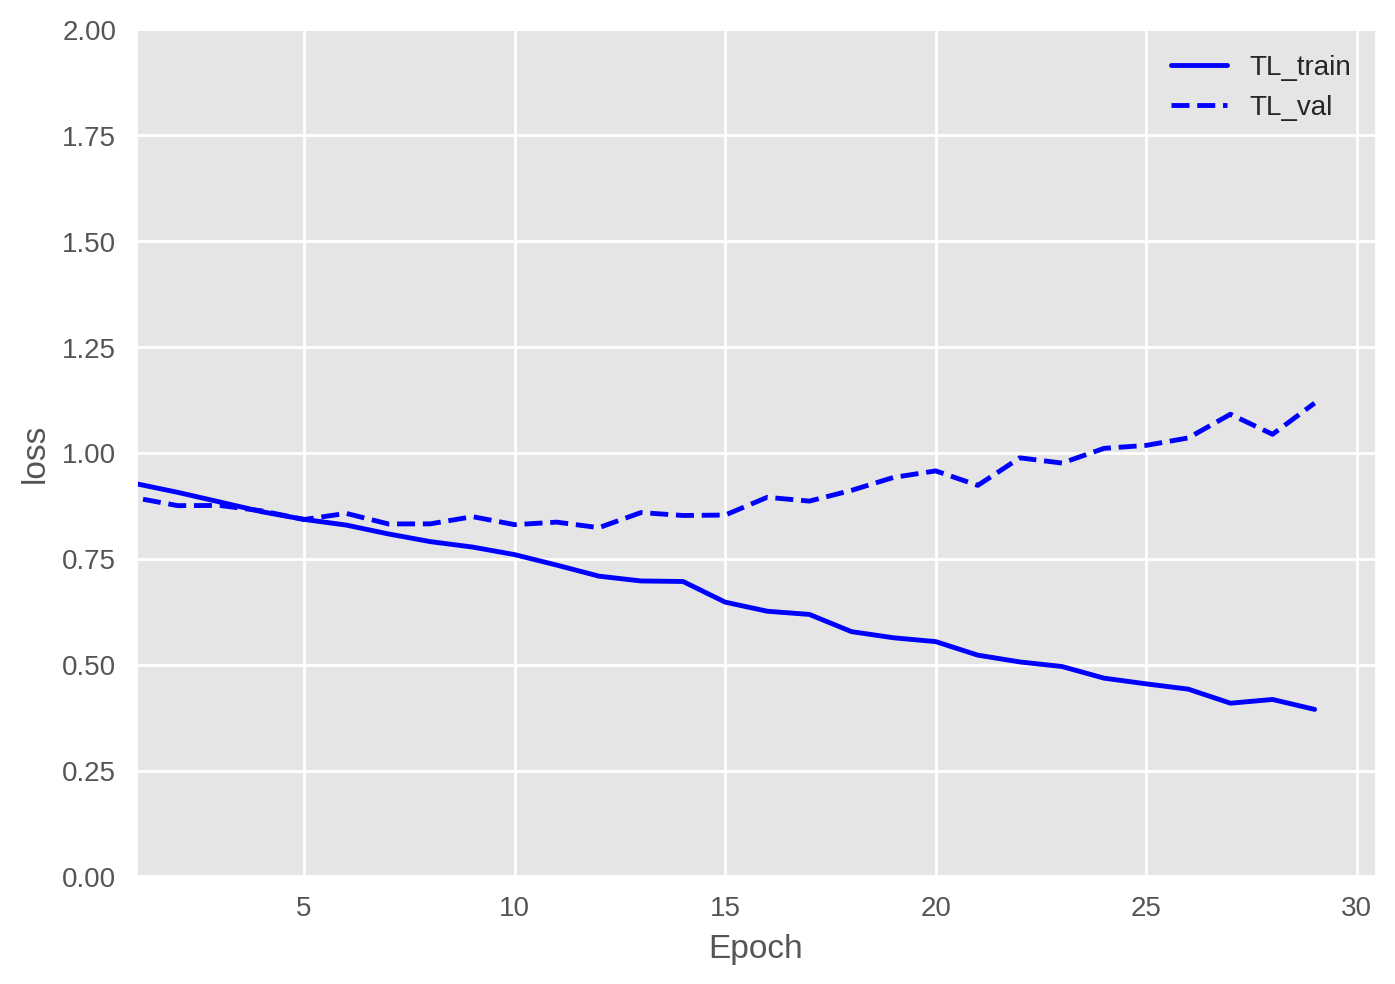

In [ ]:
plotter(m_histories, ylim=[0.0, 2], metric = 'loss')                            # Ploting the learning curve with the help of plotter function

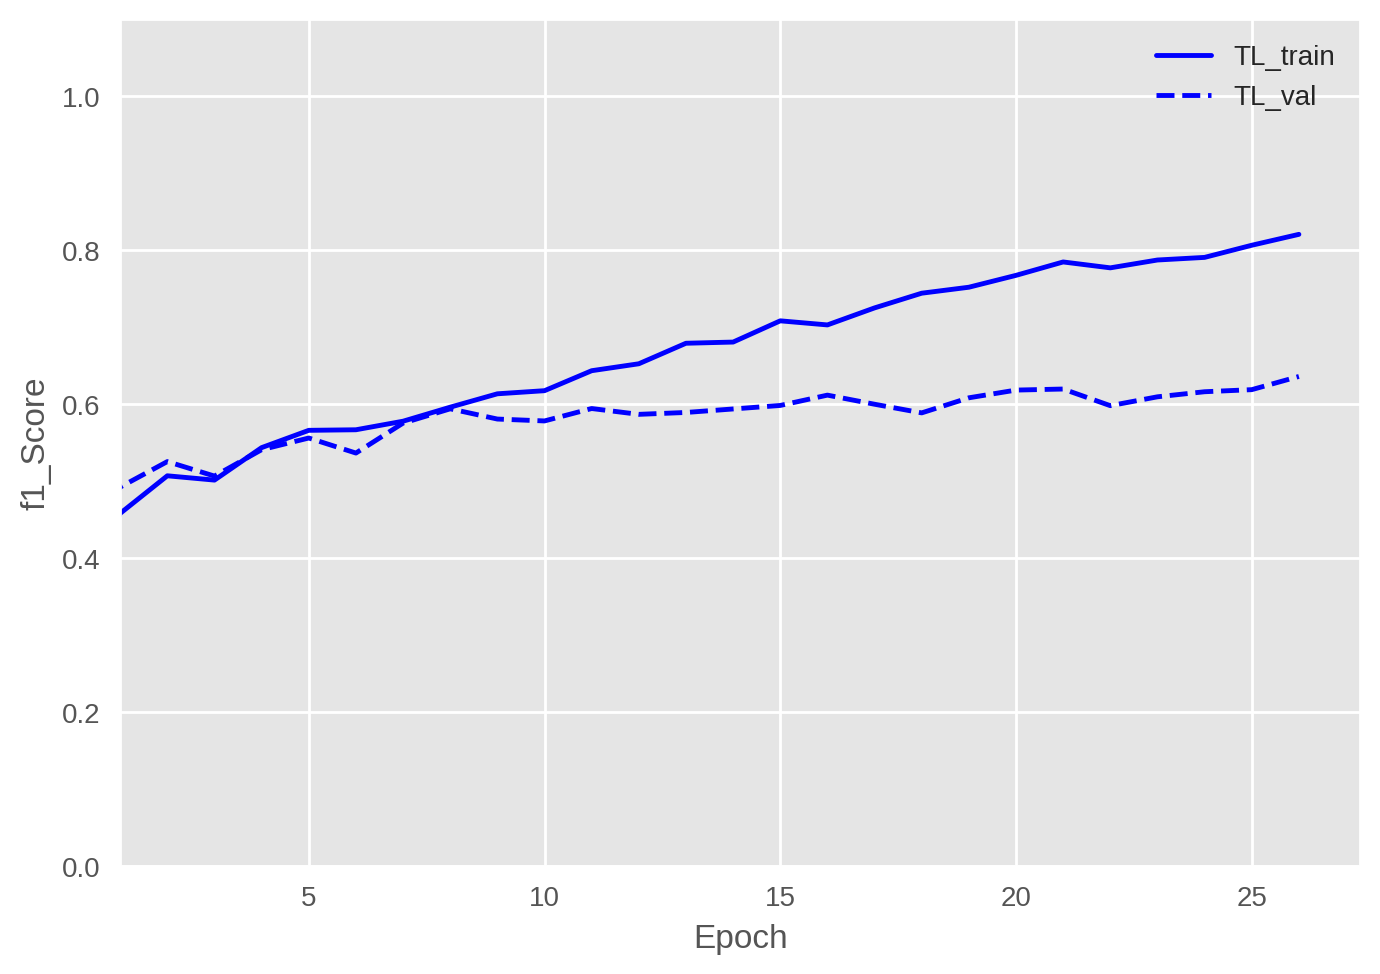

In [ ]:
plotter(m_histories, ylim=[0.0, 1.1], metric = 'f1_Score')                      # Ploting the learning curve with the help of plotter function

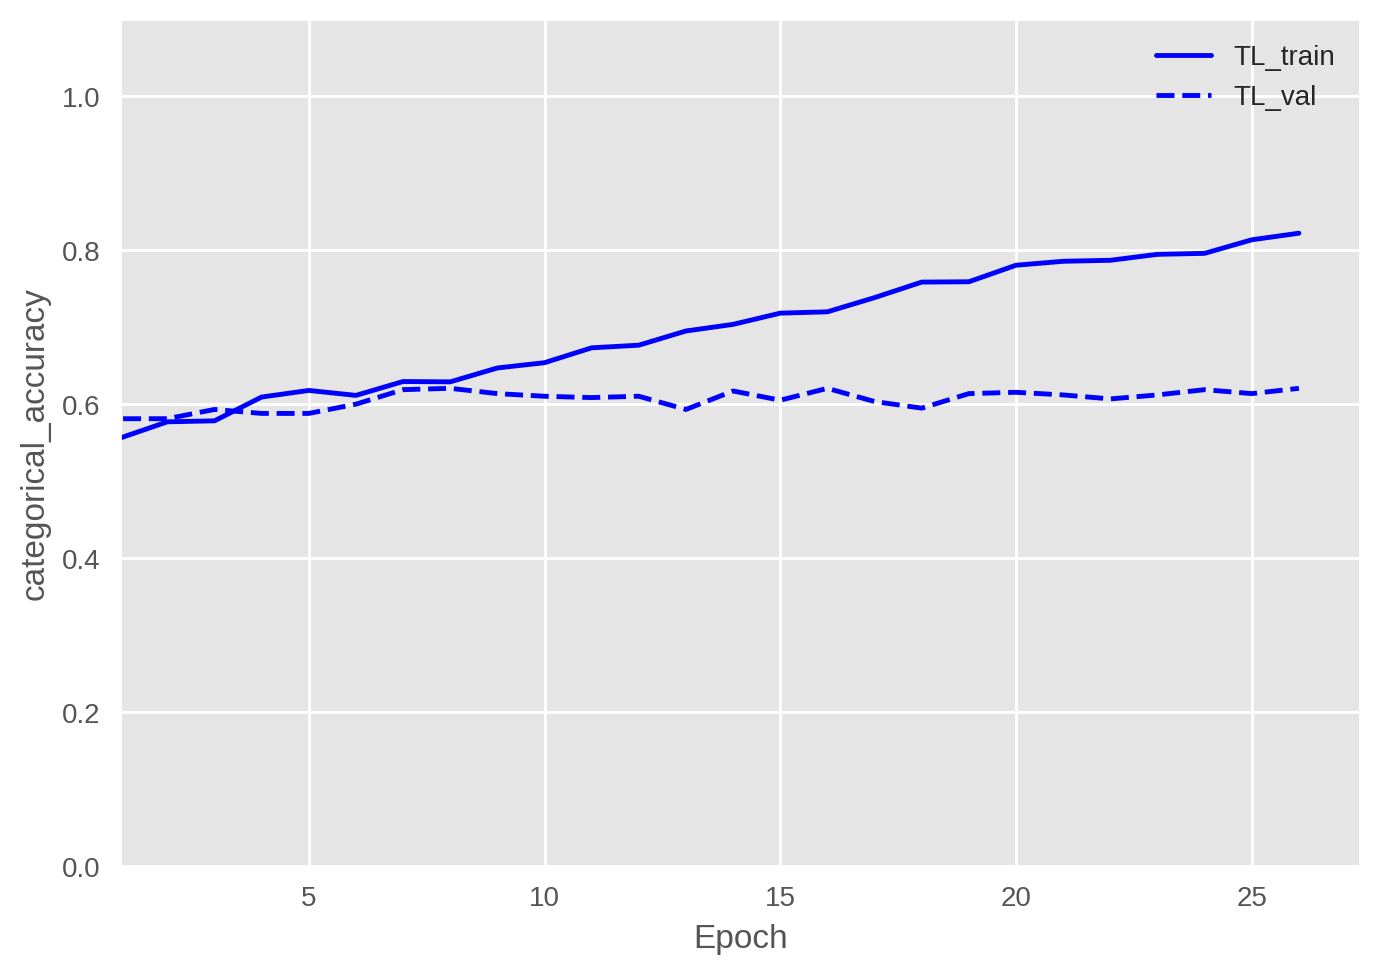

In [ ]:
plotter(m_histories, ylim=[0.0, 1.1], metric = 'categorical_accuracy')                      # Ploting the learning curve with the help of plotter function

# Model with Regulaization techniques

In [ ]:
reg_model = model(tweet_input_shape, target_input_shape,
                             num_stance_classes, TL_word_index, TL_E_T)         # Creating Model instance for adding regualization techniques in the model

In [ ]:
from tensorflow.keras.regularizers import l1

l1_strength = 0.001
for layer in reg_model.layers:
    if hasattr(layer, 'kernel_regularizer'):
                                                                                # Apply l1 regularization to the layer's kernel weights
        layer.kernel_regularizer = l1(l1 = l1_strength)

In [ ]:
from tensorflow.keras.optimizers import Adam

learning_rate = 0.0001                                                          # Set the learning rate for the Adam optimizer
optimizer = Adam(learning_rate=learning_rate)                                   # Create an instance of the Adam optimizer


In [ ]:
reg_model.compile(optimizer=optimizer, loss='categorical_crossentropy',         # Compling the model with the regualization techniques
                  metrics=['categorical_accuracy', f1_Score])

In [ ]:
m_histories['TL_reg'] = reg_model.fit(
    [training_tweet, target_train],                                             # Input data: tweets and target
    Y_train,                                                                    # Target data: stance labels
    epochs=100,
    batch_size=batch_size,
    validation_data=([val_tweet, target_val], Y_val),                           # Validation Data
    callbacks=get_callbacks('models/TL_reg'),                                    # Adding Callbacks
    verbose=1
)

Epoch 1/100
73/73 [==============================] - 16s 159ms/step - loss: 1.0718 - categorical_accuracy: 0.4333 - f1_Score: 0.0861 - val_loss: 1.0191 - val_categorical_accuracy: 0.4957 - val_f1_Score: 0.3745
Epoch 2/100
73/73 [==============================] - 9s 128ms/step - loss: 1.0295 - categorical_accuracy: 0.4886 - f1_Score: 0.3077 - val_loss: 0.9908 - val_categorical_accuracy: 0.5129 - val_f1_Score: 0.3992
Epoch 3/100
73/73 [==============================] - 11s 147ms/step - loss: 0.9970 - categorical_accuracy: 0.5148 - f1_Score: 0.3548 - val_loss: 0.9746 - val_categorical_accuracy: 0.5626 - val_f1_Score: 0.4177
Epoch 4/100
73/73 [==============================] - 11s 153ms/step - loss: 0.9837 - categorical_accuracy: 0.5393 - f1_Score: 0.3370 - val_loss: 0.9475 - val_categorical_accuracy: 0.5626 - val_f1_Score: 0.4055
Epoch 5/100
73/73 [==============================] - 12s 162ms/step - loss: 0.9657 - categorical_accuracy: 0.5560 - f1_Score: 0.3735 - val_loss: 0.9393 - val_cat

**TL_train,TL_val**: The Model is trained without regularization only GloVe Word Embaddings

**TL_reg_train,TL_reg_Val**: The Model is trained with regularization techniques


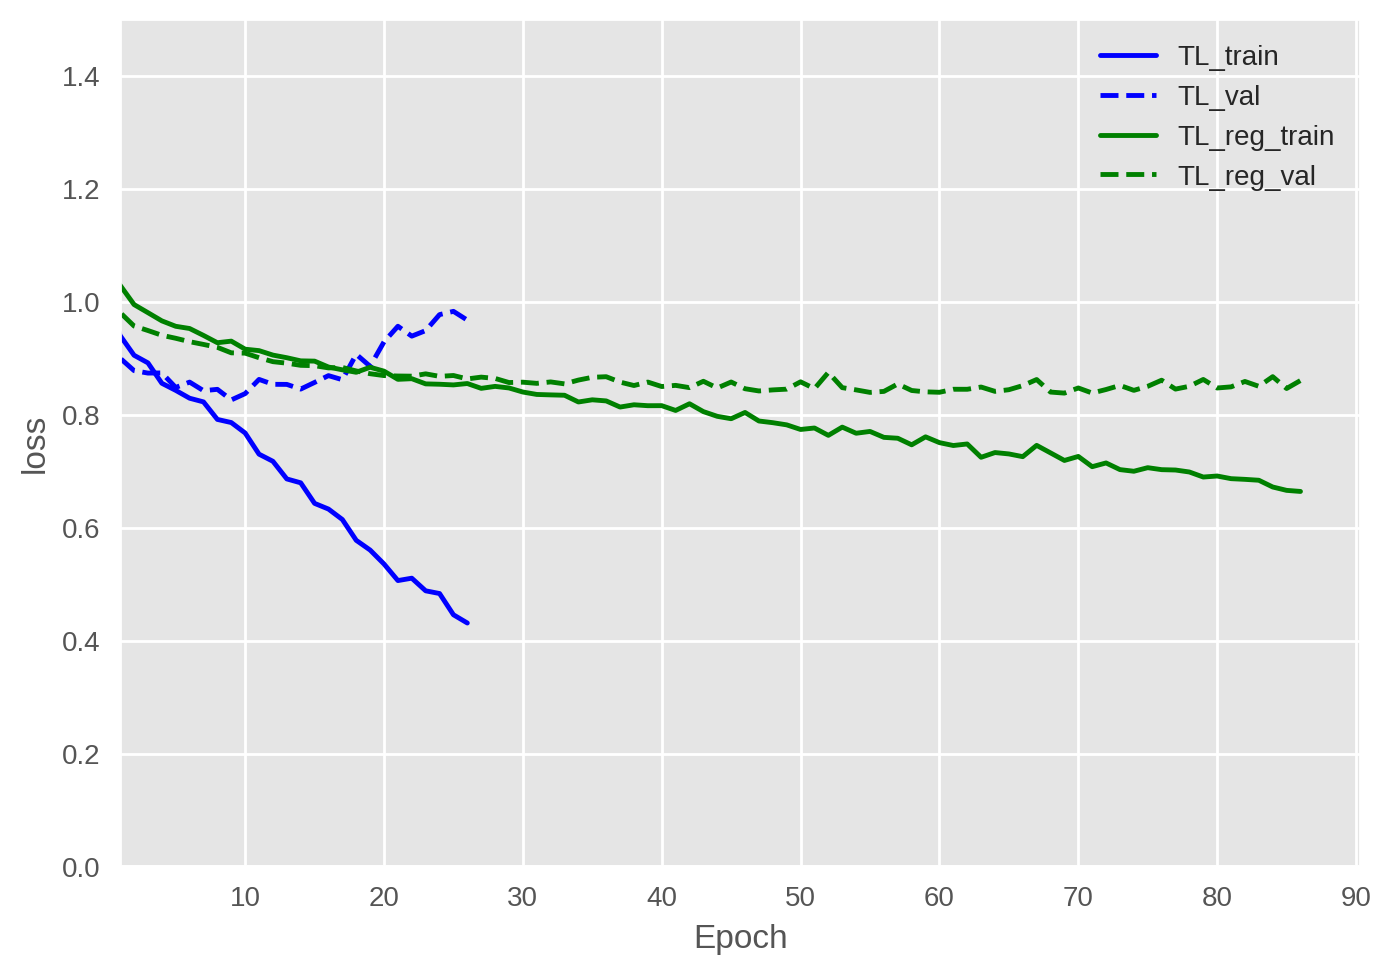

In [ ]:
plotter(m_histories, ylim=[0.0, 1.5], metric = 'loss')                          # Ploting the learning curve with the help of plotter function

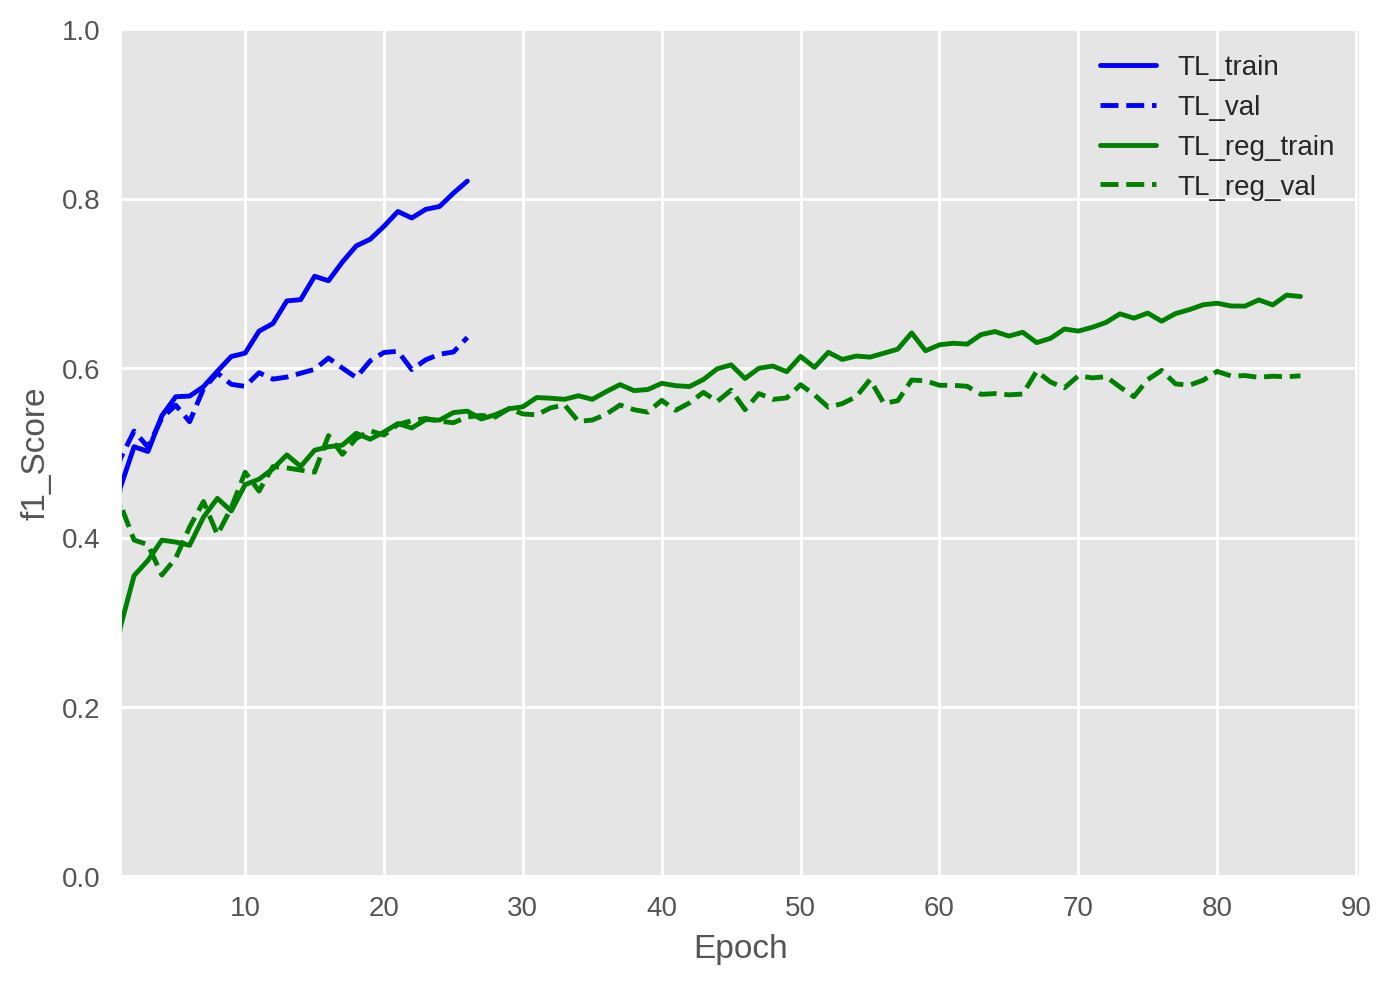

In [ ]:
plotter(m_histories, ylim=[0.0, 1], metric = 'f1_Score')                        # Ploting the learning curve with the help of plotter function

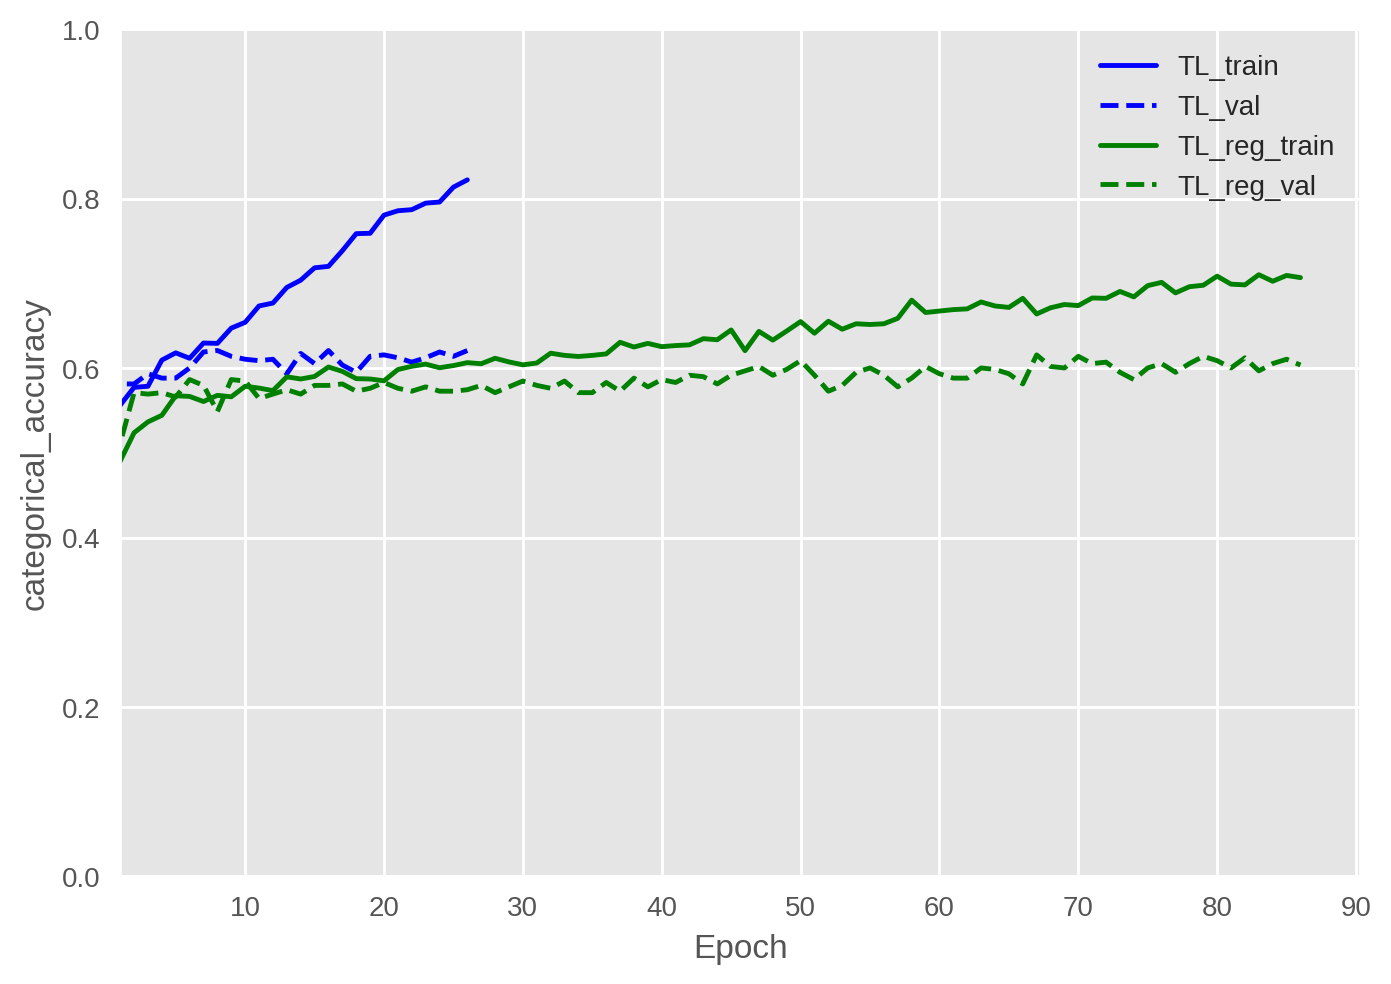

In [ ]:
plotter(m_histories, ylim=[0.0, 1], metric = 'categorical_accuracy')            # Ploting the learning curve with the help of plotter function

# Applying Oversampling on Stances

In [ ]:
train_df.head(3)

Tweet  Target  Stance  \
1282  @UN_Women @WomenUndrSiege @OSCE_RFoM It should...       1       2   
2313  @glennbeck I would like to see poll: How many ...       2       0   
1065  Women are superior to men in every aspect #fem...       1       2   

                                        Opinion Towards Sentiment  \
1282  1.  The tweet explicitly expresses opinion abo...       neg   
2313  1.  The tweet explicitly expresses opinion abo...       neg   
1065  1.  The tweet explicitly expresses opinion abo...       pos   

                                         cleaned_tweets  \
1282  [considered, hate, crime, someone, make, threa...   
2313  [would, like, see, poll, many, abortion, docto...   
1065              [woman, superior, men, every, aspect]   

                                            tweets_pads  
1282  [616, 97, 232, 100, 16, 1374, 1, 0, 0, 0, 0, 0...  
2313  [24, 7, 48, 2389, 71, 11, 390, 309, 1, 11, 510...  
1065  [1, 809, 19, 62, 3746, 0, 0, 0, 0, 0, 0, 0, 0,...

In [ ]:
D_train = train_df[["tweets_pads","Target"]]                                    # Creating a sub-Dataframe for implimenting the oversampling

In [ ]:
Stances = train_df["Stance"]                                                    # Fittering the Stance column Data

In [ ]:
oversampler = RandomOverSampler(random_state=42)                                # Create a RandomOverSampler instance with a specified random seed
                                                                                # Oversample the training data and target labels
D_train_oversampled, T_train_oversampled = oversampler.fit_resample(D_train, Stances)

In [ ]:
D_train_oversampled["Stance"] = T_train_oversampled                             # Adding the Stance column into the OVersamped Data

In [ ]:
print("Data points in Training Data Before Oversampling: ", train_df.shape[0],"\n")

print("Data points in Training Data After Oversampling: ", D_train_oversampled.shape[0])



Data points in Training Data Before Oversampling:  2331 

Data points in Training Data After Oversampling:  3318


In [ ]:
train_df["Stance"].value_counts()                                               # Before OVersampling the class distribution of Stances

0    1106
1     619
2     606
Name: Stance, dtype: int64

In [ ]:
D_train_oversampled["Stance"].value_counts()                                    # After Oversampling the class distribution

2    1106
0    1106
1    1106
Name: Stance, dtype: int64

Creating subplots to compare the class distribution before and after the oversampling

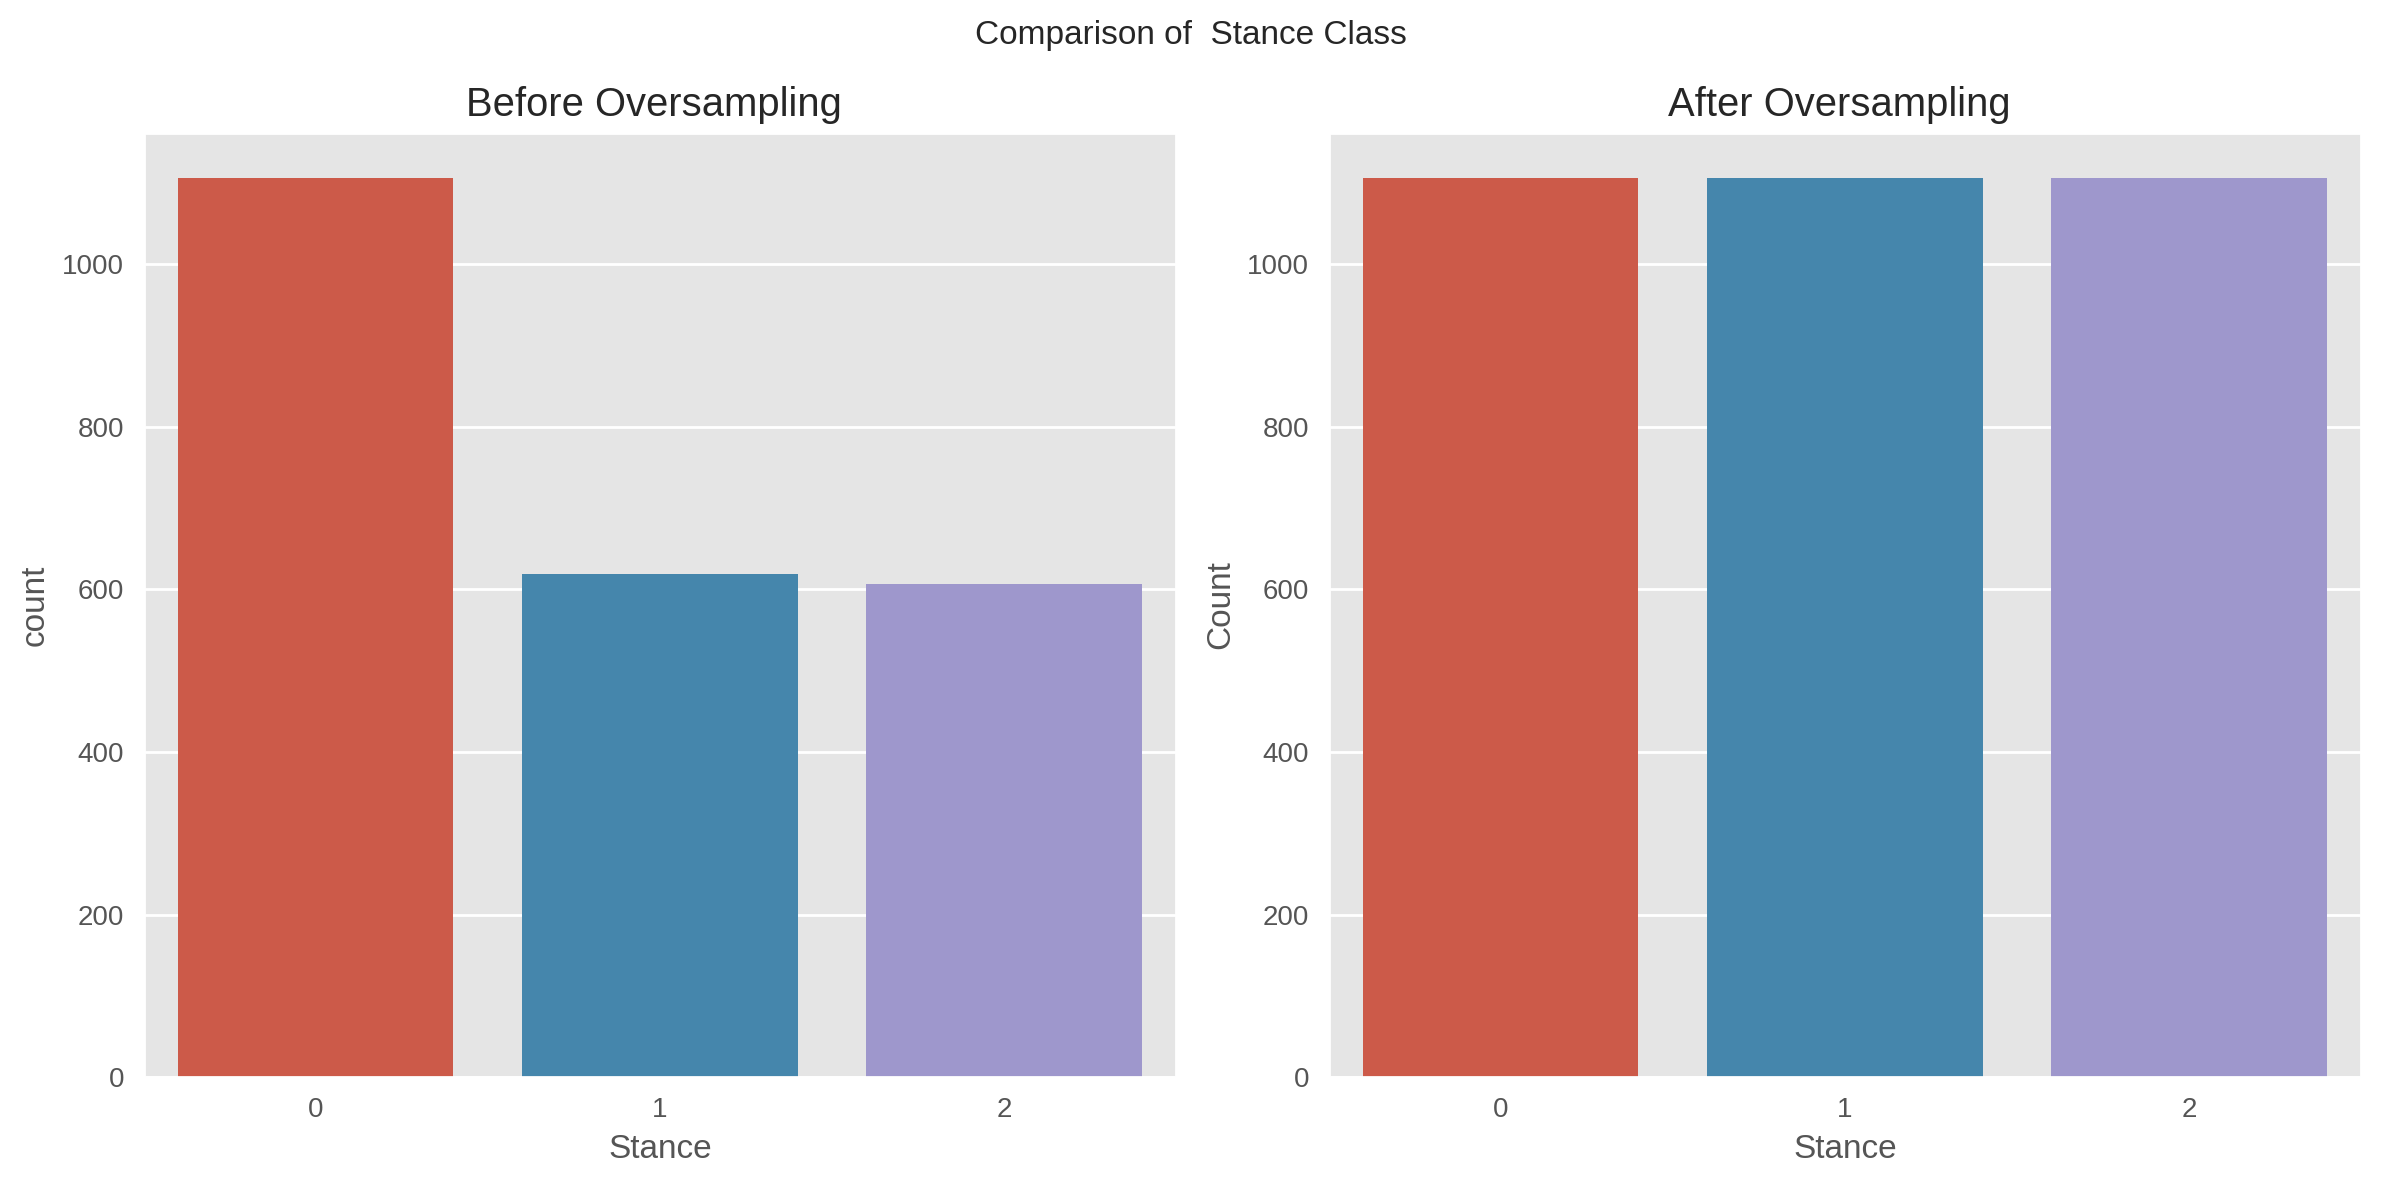

In [ ]:
                                                                                # Create subplots with 1 row and 2 columns for side-by-side comparison
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

                                                                                # Plot a countplot for categorical classes before Oversampling
sns.countplot(data=train_df, x='Stance', ax=axes[0])
axes[0].set_title('Before Oversampling ')

                                                                                # Plot a countplot for categorical classes after Oversampling
sns.countplot(data=D_train_oversampled, x='Stance', ax=axes[1])
axes[1].set_title('After Oversampling ')

                                                                                # Set labels, titles, and adjust layout
plt.xlabel('Stance')
plt.ylabel('Count')
plt.suptitle('Comparison of  Stance Class')
plt.tight_layout()

                                                                                # Show the plot
plt.show()


In [ ]:
                                                                                # Making the Oversampled data shape according to the model input

training_Oversampled_tweets = np.array(D_train_oversampled["tweets_pads"].values.tolist(), dtype=np.int32)

                                                                                # Doing one hot encoding for target and stance column
training_target_category = D_train_oversampled["Target"].values
training_stance_cateogory = D_train_oversampled["Stance"].values

target_values = np.max(training_target_category) + 1

target_Oversampled_train = np.eye(target_values)[training_target_category]

stance_values = np.max(training_stance_cateogory) + 1

Y_Oversampled_train = np.eye(stance_values)[training_stance_cateogory]


In [ ]:
print('Shape of X_train:', training_Oversampled_tweets.shape)                   # Printing the shape of training Data
print('Shape of target_train:', target_Oversampled_train.shape)
print('Shape of Y_train:', Y_Oversampled_train.shape)

Shape of X_train: (3318, 45)
Shape of target_train: (3318, 5)
Shape of Y_train: (3318, 3)


In [ ]:
model_OS_TL = model(tweet_input_shape, target_input_shape, num_stance_classes,TL_word_index,TL_E_T)  # Creating Model instance

In [ ]:
from tensorflow.keras.regularizers import l1

l2_strength = 0.001
l1_strength = 0.001
for layer in model_OS_TL.layers:
    if hasattr(layer, 'kernel_regularizer'):
                                                                                # Apply l1 regularization to the layer's kernel weights
        layer.kernel_regularizer = l1(l1 = l1_strength)

In [ ]:
from tensorflow.keras.optimizers import Adam

learning_rate = 0.0001                                                           # Set the learning rate for the Adam optimizer
optimizer = Adam(learning_rate=learning_rate)

In [ ]:
model_OS_TL.compile(optimizer=optimizer, loss='categorical_crossentropy',       # Compiling the model
                    metrics= ['categorical_accuracy', f1_Score])


In [ ]:
m_histories['TL_OV'] = model_OS_TL.fit(
    [training_Oversampled_tweets, target_Oversampled_train],                    # Input data: Oversampled tweets and target
    Y_Oversampled_train,                                                        # Target data: Oversampled stance labels
    epochs=60,
    batch_size=32,
    validation_data=([val_tweet, target_val], Y_val),                           # Orignal Validation Data
    callbacks=get_callbacks('models/TL_OV'),
    verbose=1
)

Epoch 1/60
104/104 [==============================] - 31s 213ms/step - loss: 1.0955 - categorical_accuracy: 0.3665 - f1_Score: 0.0035 - val_loss: 1.0655 - val_categorical_accuracy: 0.4768 - val_f1_Score: 0.0000e+00
Epoch 2/60
104/104 [==============================] - 24s 229ms/step - loss: 1.0592 - categorical_accuracy: 0.4427 - f1_Score: 0.0133 - val_loss: 1.0324 - val_categorical_accuracy: 0.5060 - val_f1_Score: 0.0096
Epoch 3/60
104/104 [==============================] - 22s 211ms/step - loss: 1.0291 - categorical_accuracy: 0.4801 - f1_Score: 0.1025 - val_loss: 0.9995 - val_categorical_accuracy: 0.5077 - val_f1_Score: 0.1984
Epoch 4/60
104/104 [==============================] - 24s 229ms/step - loss: 0.9968 - categorical_accuracy: 0.5133 - f1_Score: 0.2553 - val_loss: 0.9715 - val_categorical_accuracy: 0.5214 - val_f1_Score: 0.2917
Epoch 5/60
104/104 [==============================] - 23s 224ms/step - loss: 0.9788 - categorical_accuracy: 0.5232 - f1_Score: 0.3290 - val_loss: 0.9619

**TL_train,TL_val**: The Model is trained without regularization only GloVe Word Embaddings

**TL_reg_train,TL_reg_Val**: The Model is trained with regularization techniques

**TL_OV_train,TL_OV_val**: In this part we are oversampling the stance and training the model with regualization


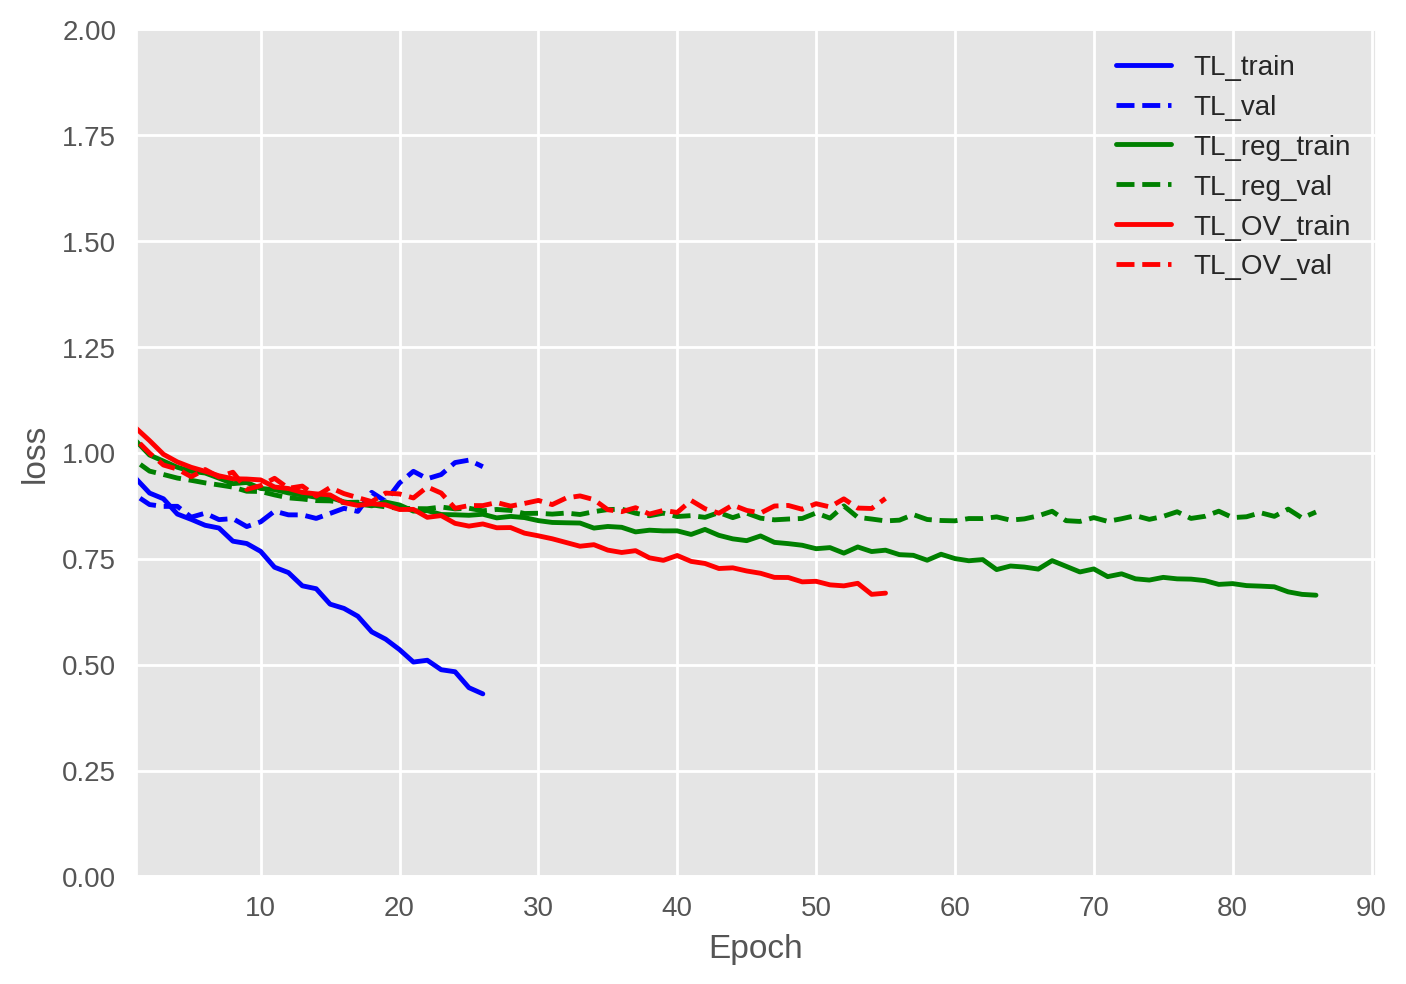

In [ ]:
plotter(m_histories, ylim=[0.0, 2.0], metric = 'loss')                          # Ploting the learning curve with the help of plotter function

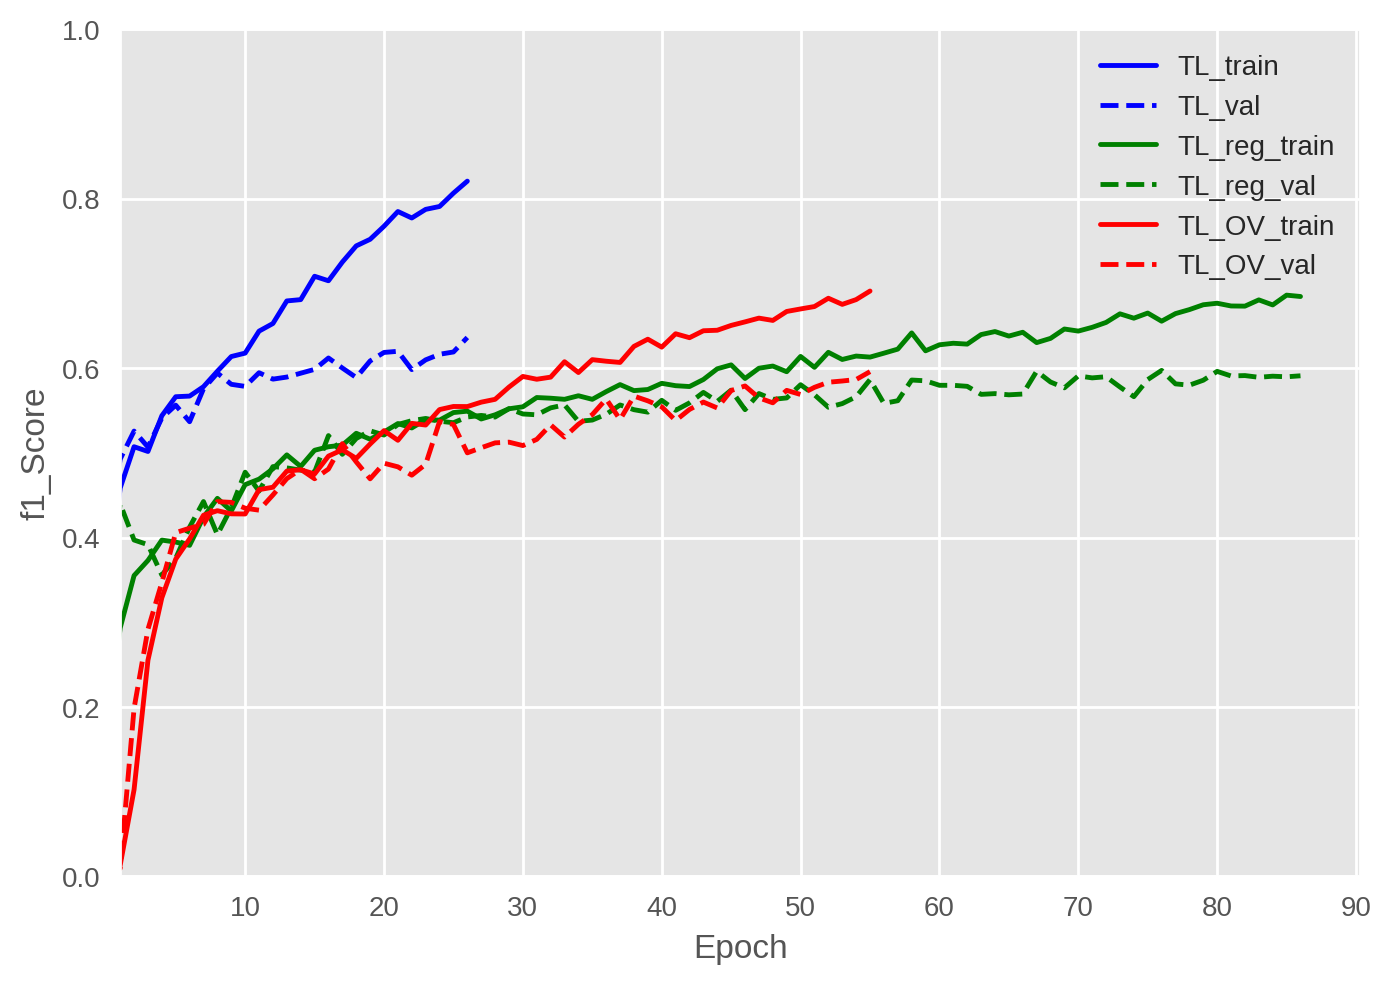

In [ ]:
plotter(m_histories, ylim=[0.0, 1.0], metric = 'f1_Score')                      # Ploting the learning curve with the help of plotter function

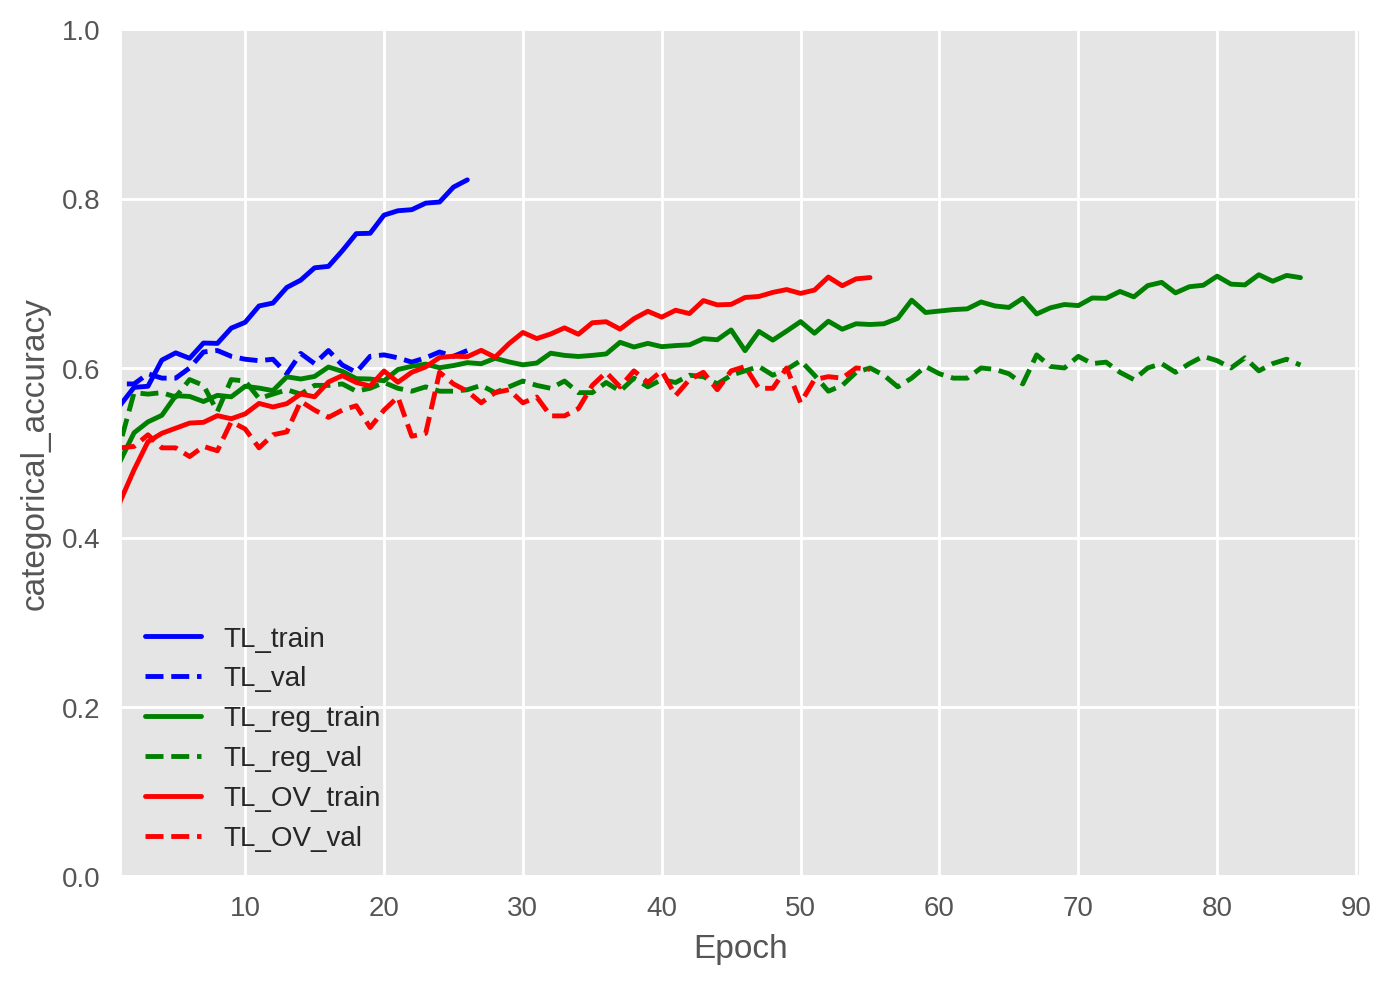

In [ ]:
plotter(m_histories, ylim=[0.0, 1.0], metric = 'categorical_accuracy')

# Data Augmentation on all the Data

In [ ]:
train_df.reset_index(drop=True)[0:3]                                            # Reset the index of training Data

Tweet  Target  Stance  \
0  @UN_Women @WomenUndrSiege @OSCE_RFoM It should...       1       2   
1  @glennbeck I would like to see poll: How many ...       2       0   
2  Women are superior to men in every aspect #fem...       1       2   

                                     Opinion Towards Sentiment  \
0  1.  The tweet explicitly expresses opinion abo...       neg   
1  1.  The tweet explicitly expresses opinion abo...       neg   
2  1.  The tweet explicitly expresses opinion abo...       pos   

                                      cleaned_tweets  \
0  [considered, hate, crime, someone, make, threa...   
1  [would, like, see, poll, many, abortion, docto...   
2              [woman, superior, men, every, aspect]   

                                         tweets_pads  
0  [616, 97, 232, 100, 16, 1374, 1, 0, 0, 0, 0, 0...  
1  [24, 7, 48, 2389, 71, 11, 390, 309, 1, 11, 510...  
2  [1, 809, 19, 62, 3746, 0, 0, 0, 0, 0, 0, 0, 0,...

In [ ]:
augmenter = naw.SynonymAug(aug_src='wordnet')                                   # calling wordnet Synonym for the data augmentation

In [ ]:
def text_augmentation(tweet):                                                   # Creating a function that will do augmentation on tweet one by one
    augmented_tweet = augmenter.augment(tweet)
    return augmented_tweet


In [ ]:
len(train_df)

2331

In [ ]:
train_df['augmented_tweet'] = train_df['cleaned_tweets'].apply(text_augmentation)
                                                                                # Appling Data augmentatuon on cleaned tweets column

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


# Compare the words before and after data augmentation
by using word colud we will plot the word cloud of top 50 words before and after the data augmentation

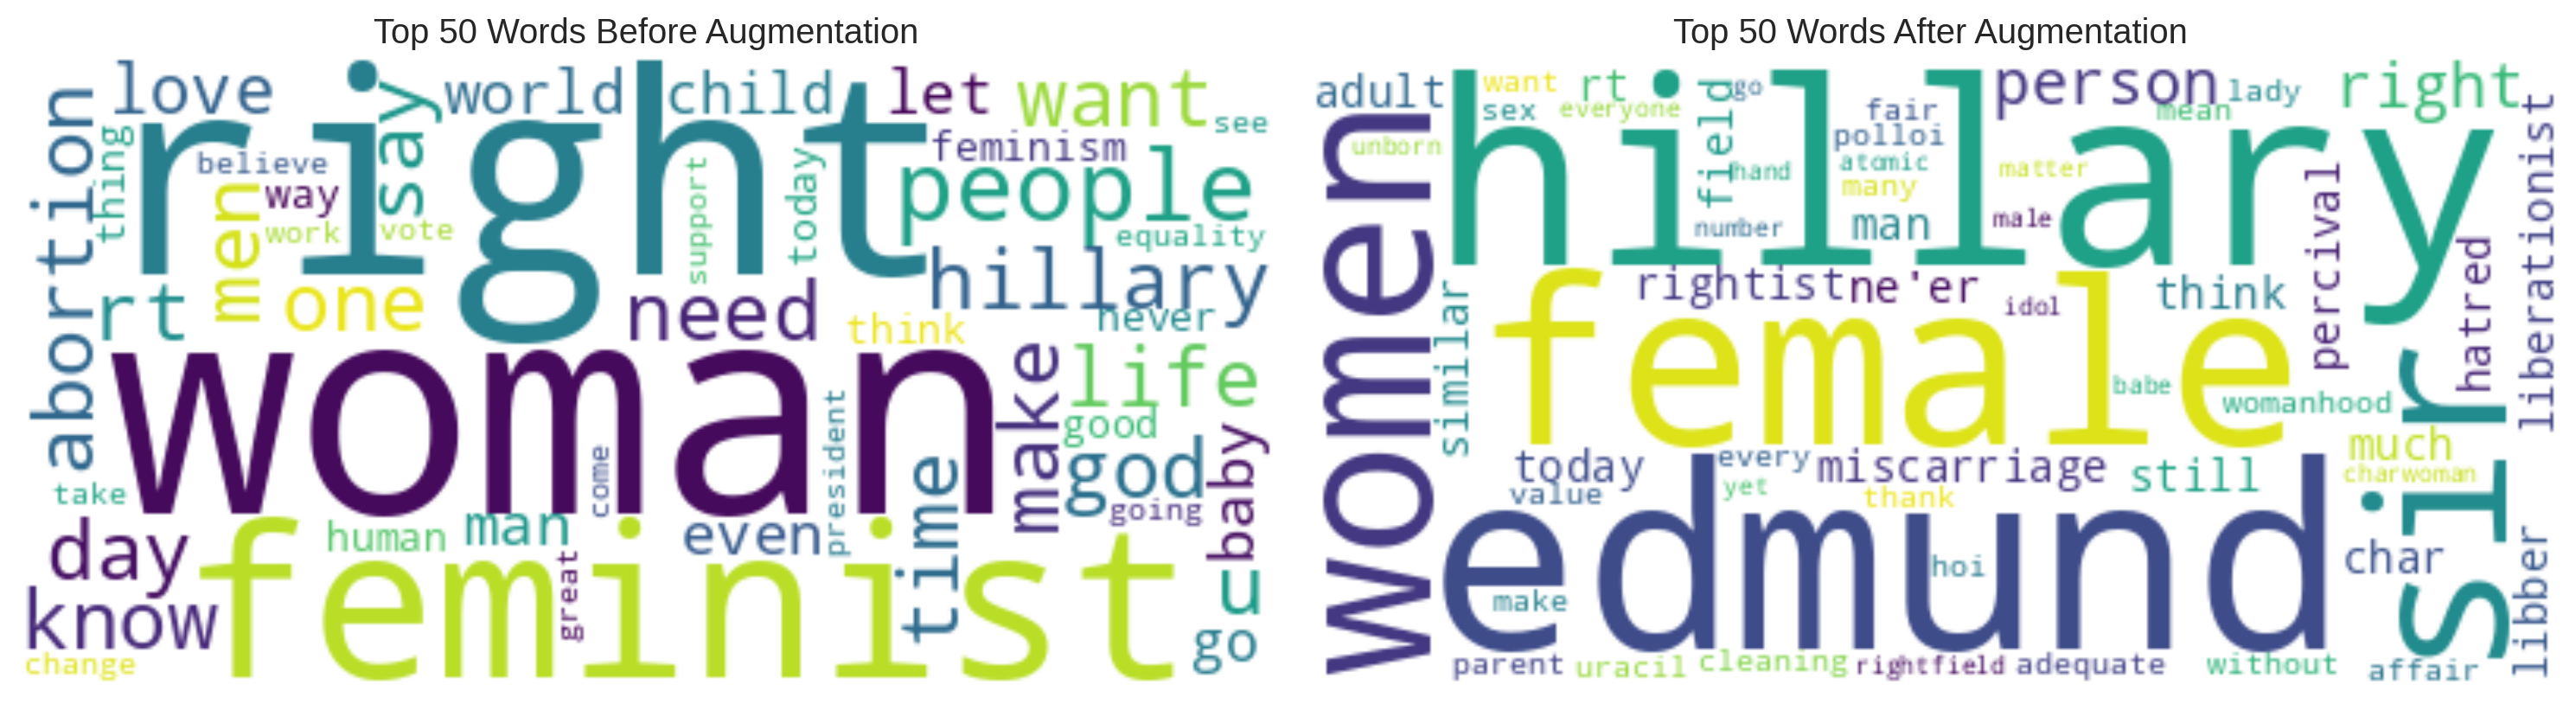

In [ ]:
                                                                                # Function to generate word cloud for a given column
def generate_word_cloud(data, title):
    counter = Counter(data[0])
    for i in data[1:]:
        counter.update(i)

    most_fw_50 = counter.most_common(50)
    most_50_fw = [token[0] for token in most_fw_50]
    text = ' '.join(most_50_fw)
    wordcloud = WordCloud(width=400, height=200, background_color='white').generate(text)

    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(title)

                                                                                # Create a figure with two subplots
plt.figure(figsize=(15, 5))

                                                                                # Subplot 1: Top 50 words before data augmentation
plt.subplot(1, 2, 1)
generate_word_cloud(train_df["cleaned_tweets"], "Top 50 Words Before Augmentation")

                                                                                # Subplot 2: Top 50 words after data augmentation
plt.subplot(1, 2, 2)
generate_word_cloud(train_df["augmented_tweet"], "Top 50 Words After Augmentation")

                                                                                # Adjust the spacing between subplots
plt.tight_layout()

                                                                                # Show the figure
plt.show()


- After Data augmentation creating new word index and numeric representation
After Data augmentation in our tweet there is new words so before implimenting the model we need to do embaddings for that word so we are creating now again word index and then mapping with grove word embadding

In [ ]:
val_tweet = val_df["cleaned_tweets"].to_list()                                  # Making list of validation Data tweet
augmented_tweet = train_df["augmented_tweet"].to_list()                         # Making list of augmenation Data tweet

In [ ]:
total_tweets = augmented_tweet+val_tweet                                        # Combining the list of val and train data into one list

In [ ]:
all_aug_word_index,all_aug_vocab_size,all_aug_tweets_pad =indexing_padding(total_tweets)              # Using indexing_padding to do padding, to create word index
                                                                                # And numeric representation of text

unique tokens of tweets - 8145
vocab_size of tweets - 8146


Here we are doing sublisting of the created list because when we add the list at the bottom of the augmenation tweet so the order is preserve so we are filtter the list by using the specific number according to the previous number of data in training

In [ ]:
val_tweets = all_aug_tweets_pad[2331:]                                                  # creating the validation list

In [ ]:
train_tweets = all_aug_tweets_pad[:2331]                                                # Training data

In [ ]:
train_tweets.shape

(2331, 45)

In [ ]:
all_E_T = np.zeros((len(all_aug_word_index) + 1, embedding_dim))                            # Extracting word embadding representation
for word, i in all_aug_word_index.items():
    embedding_vector = glove_vectors.get(word)                                  # By using word index dictionary of the tweet vocabilary
    if embedding_vector is not None:
        all_E_T[i] = embedding_vector                                               # Storing the extracted word embaddings

In [ ]:
all_aug_model = model(tweet_input_shape, target_input_shape, num_stance_classes,all_aug_word_index,all_E_T)# Creating the instance of Model

In [ ]:
l1_strength = 0.001
for layer in all_aug_model.layers:
    if hasattr(layer, 'kernel_regularizer'):
                                                                                # Apply l1 regularization to the layer's kernel weights
        layer.kernel_regularizer = l1(l1 = l1_strength)

In [ ]:
learning_rate = 0.0001                                                           # Set the learning rate for the Adam optimizer
optimizer = Adam(learning_rate=learning_rate)

In [ ]:
all_aug_model.compile(optimizer=optimizer, loss='categorical_crossentropy',
                      metrics= ['categorical_accuracy', f1_Score])

In [ ]:
m_histories['all_aug'] = all_aug_model.fit(
    [train_tweets, target_train],                                               # Input data: tweets and target
    Y_train,                                                                    # Target data: stance labels
    epochs=100,
    batch_size=32,
    validation_data=([val_tweets, target_val], Y_val),
    callbacks=get_callbacks('models/all_aug'),
    verbose=1
)

Epoch 1/100
73/73 [==============================] - 25s 251ms/step - loss: 1.0670 - categorical_accuracy: 0.4642 - f1_Score: 0.0489 - val_loss: 1.0296 - val_categorical_accuracy: 0.4957 - val_f1_Score: 0.4396
Epoch 2/100
73/73 [==============================] - 17s 230ms/step - loss: 1.0392 - categorical_accuracy: 0.4835 - f1_Score: 0.2263 - val_loss: 1.0087 - val_categorical_accuracy: 0.4974 - val_f1_Score: 0.4628
Epoch 3/100
73/73 [==============================] - 16s 225ms/step - loss: 1.0241 - categorical_accuracy: 0.5028 - f1_Score: 0.3083 - val_loss: 0.9898 - val_categorical_accuracy: 0.5249 - val_f1_Score: 0.4072
Epoch 4/100
73/73 [==============================] - 16s 223ms/step - loss: 1.0130 - categorical_accuracy: 0.5208 - f1_Score: 0.3220 - val_loss: 0.9755 - val_categorical_accuracy: 0.5678 - val_f1_Score: 0.3192
Epoch 5/100
73/73 [==============================] - 19s 258ms/step - loss: 1.0056 - categorical_accuracy: 0.5212 - f1_Score: 0.3383 - val_loss: 0.9631 - val_ca

**TL_train,TL_val**: The Model is trained without regularization only GloVe Word Embaddings

**TL_reg_train,TL_reg_Val**: The Model is trained with regularization techniques

**TL_OV_train,TL_OV_val**: In this part we are oversampling the stance and training the model with regualization

**all_aug_train,all_aug_val**: In this Model Training we are doing data augmentation on all the tweets


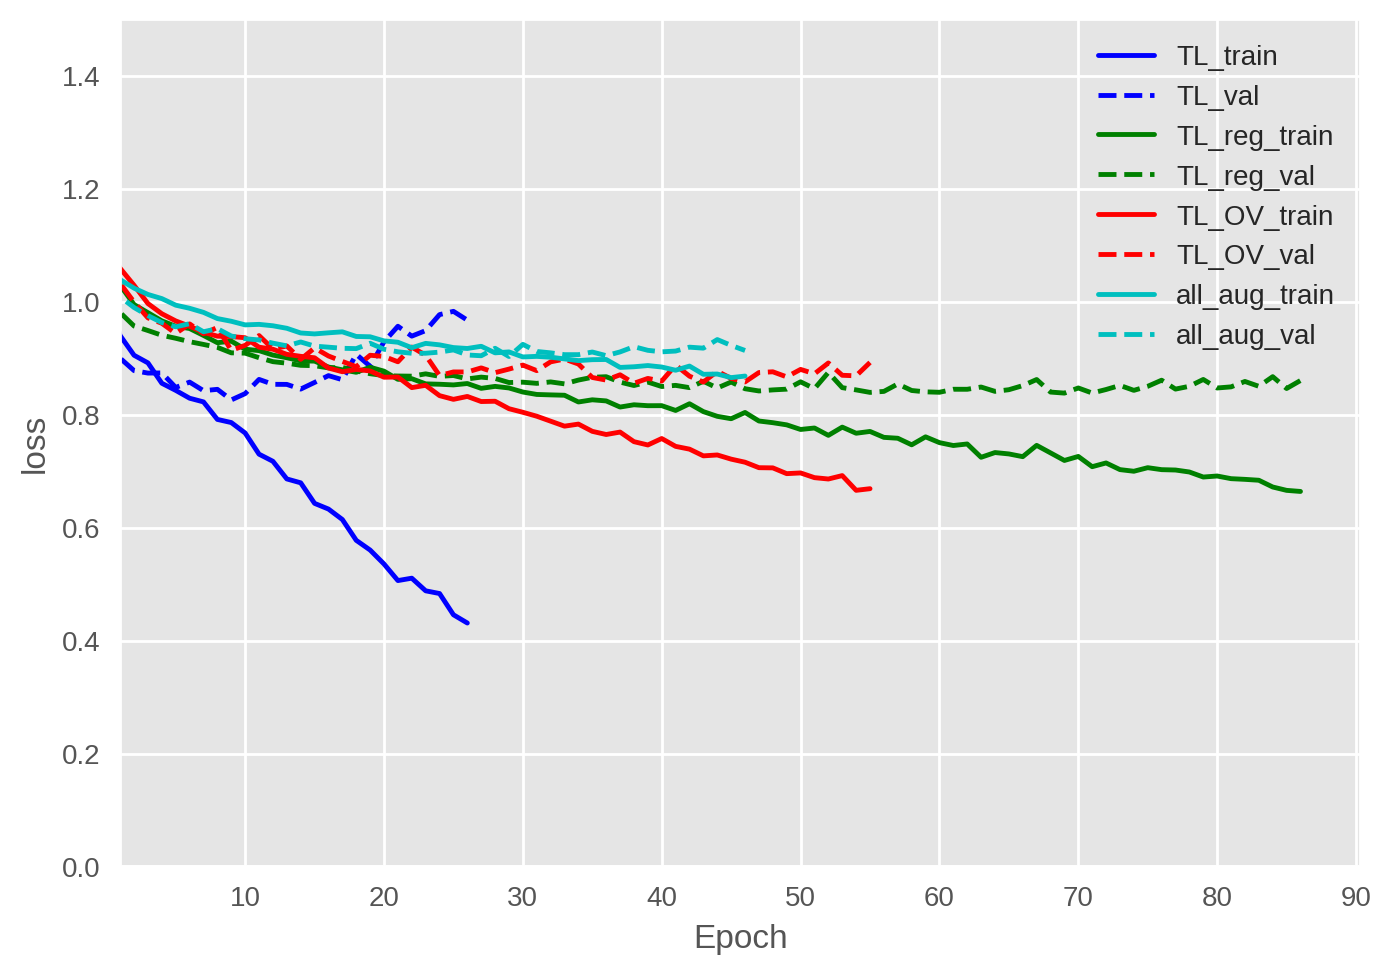

In [ ]:
plotter(m_histories, ylim=[0.0, 1.5], metric = 'loss')                          # Ploting the learning curve with the help of plotter function

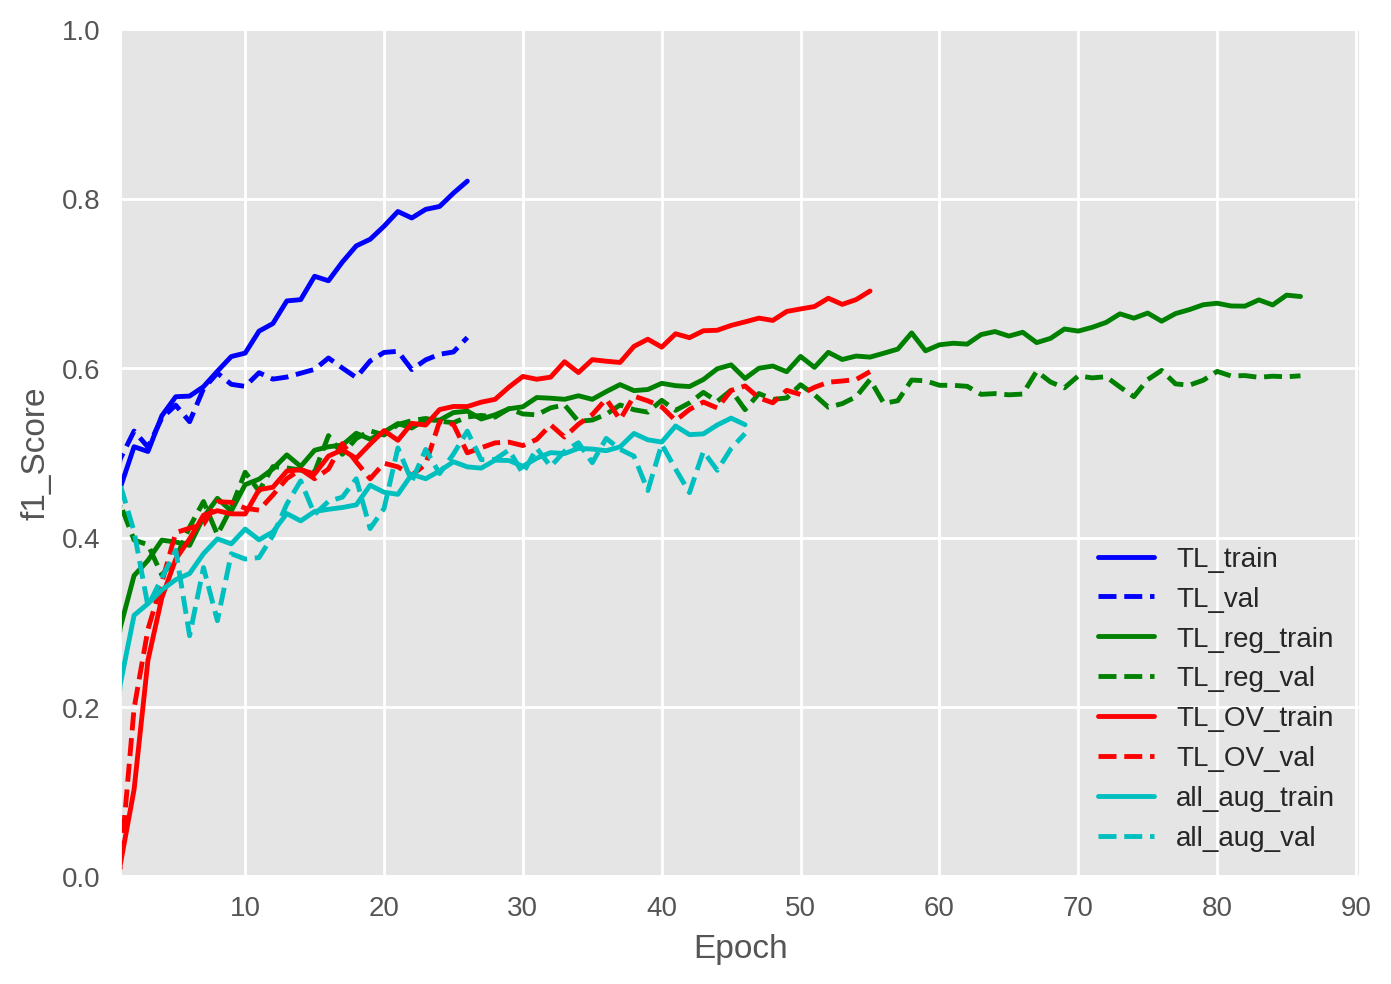

In [ ]:
plotter(m_histories, ylim=[0.0, 1.0], metric = 'f1_Score')                      # Ploting the learning curve with the help of plotter function

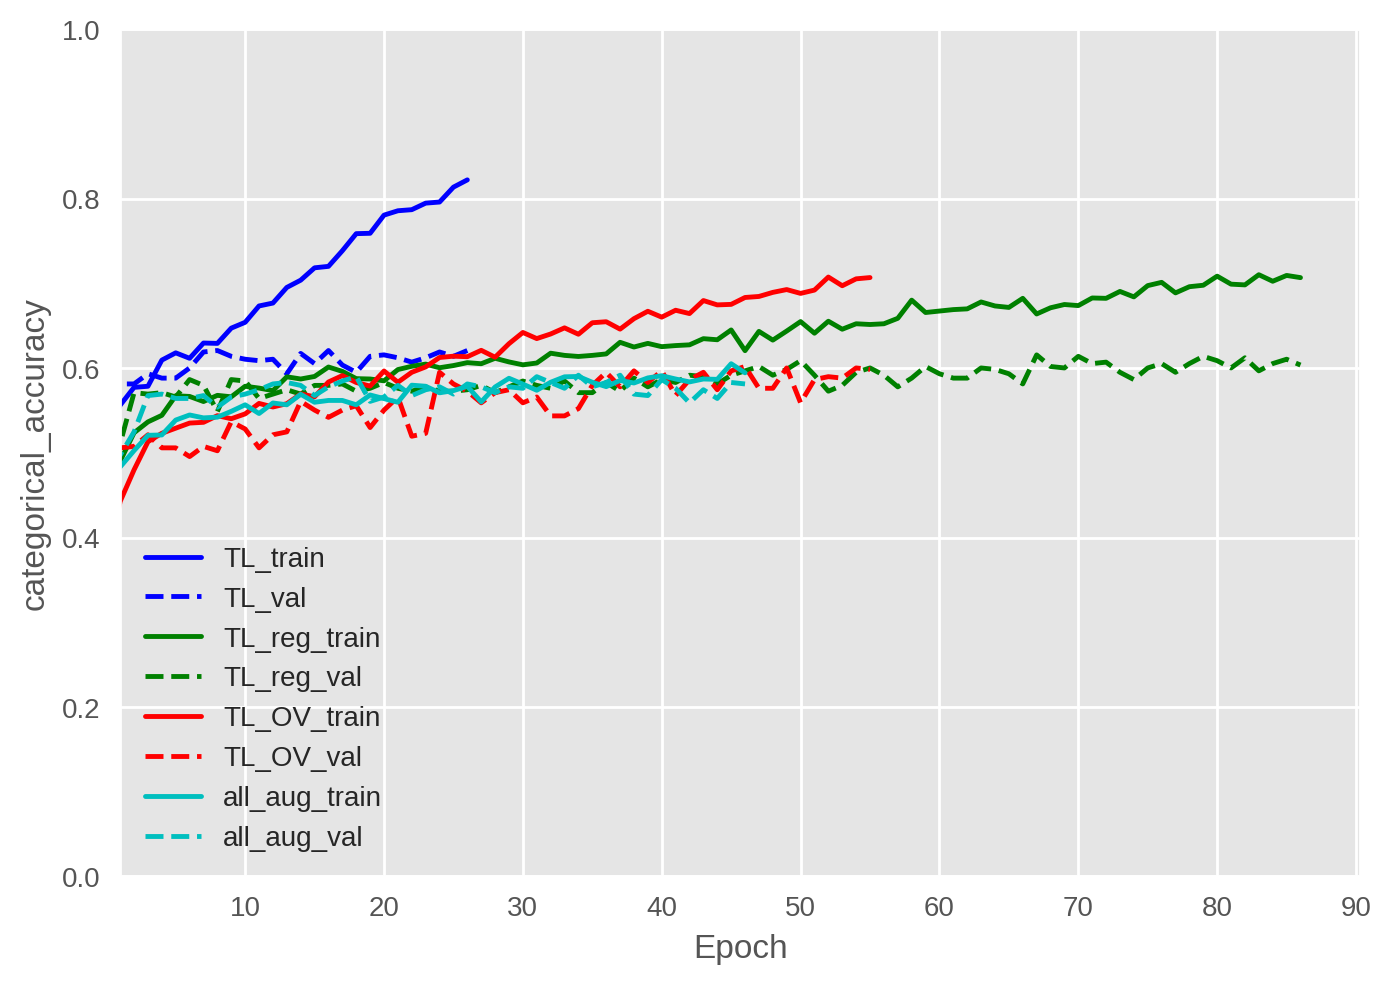

In [ ]:
plotter(m_histories, ylim=[0.0, 1.0], metric = 'categorical_accuracy')
                                        # Ploting the learning curve with the help of plotter function

# Data Augmentation on Minority class with respect to Target and stance variable

In [ ]:
train_df = train_df.drop(columns=["Opinion Towards","Sentiment","Tweet",        # fittering the training data
                                  "tweets_pads"])


In [ ]:
train_df = train_df.reset_index(drop = True)                                    # Reset the index of training data

In [ ]:
train_df

Target  Stance                                     cleaned_tweets  \
0          1       2  [considered, hate, crime, someone, make, threa...   
1          2       0  [would, like, see, poll, many, abortion, docto...   
2          1       2              [woman, superior, men, every, aspect]   
3          2       1                    [plan, endorse, able, run, fed]   
4          4       2                                   [home, simplify]   
...      ...     ...                                                ...   
2326       1       1    [gladly, accept, face, least, used, used, bill]   
2327       0       0                               [realize, one, want]   
2328       2       0  [legalized, tweeting, instead, procreating, di...   
2329       2       0  [like, abortion, even, though, scotus, say, ga...   
2330       4       1                  [thanks, supporting, legislation]   

                                        augmented_tweet  
0     [regard, hatred, offence, individual, take a l...  
1     [would, similar, take in, crown, many, miscarr...  
2     [fair sex, higher ranking, humankind, every, p...  
3     [architectural plan, endorse, able bodied, cam...  
4                                     [plate, simplify]  
...                                                 ...  
2326  [lief, accept, font, least, apply, habituate, ...  
2327              [substantiate, unrivaled, deficiency]  
2328  [legitimise, twinge, or else, procreate, discr...  
2329  [corresponding, miscarriage, still, though, sc...  
2330                     [thanks, plunk for, lawmaking]  

[2331 rows x 4 columns]

Creating the sub-Dataframe from the training data according to the minority class with respect to Target and Stace and after that we will do data augmentation on these dataframe and add with the training Data to train the model

In [ ]:
Clinton_data = train_df[(train_df["Target"] == 0) & (train_df["Stance"] != 0)].reset_index(drop = True)
abortion_data = train_df[(train_df["Target"] == 2) & (train_df["Stance"] != 0)].reset_index(drop = True)
atheism_data = train_df[(train_df["Target"] == 3) & (train_df["Stance"] != 0)].reset_index(drop = True)
Climate_data  = train_df[(train_df["Target"] == 4) & (train_df["Stance"] == 0)].reset_index(drop = True)
Feminisum_data = train_df[(train_df["Target"] == 1) & (train_df["Stance"] == 1)].reset_index(drop = True)

In [ ]:
before_augmentation_Clinton = Clinton_data['cleaned_tweets'][0]
before_augmentation_abortion = abortion_data['cleaned_tweets'][0]               # Store the token word before the Data augmentation
before_augmentation_atheism = atheism_data['cleaned_tweets'][0]

In [ ]:
                                                                                # Applying Data augmentation on the sub-Dataframe
Clinton_data['cleaned_tweets'] = Clinton_data['cleaned_tweets'].apply(text_augmentation)
abortion_data['cleaned_tweets'] = abortion_data['cleaned_tweets'].apply(text_augmentation)
atheism_data['cleaned_tweets'] = atheism_data['cleaned_tweets'].apply(text_augmentation)
Climate_data['cleaned_tweets'] = Climate_data['cleaned_tweets'].apply(text_augmentation)
Feminisum_data['cleaned_tweets'] = Feminisum_data['cleaned_tweets'].apply(text_augmentation)

In [ ]:
print("\tThe output after Data augmentation\n")                                 # Printing the difference before and after the Data augmentation
print(before_augmentation_Clinton, "------------->",Clinton_data["cleaned_tweets"][0])
print(before_augmentation_abortion, "------------>",abortion_data["cleaned_tweets"][0])
print(before_augmentation_atheism, "------------>",atheism_data["cleaned_tweets"][0])


	The output after Data augmentation

['get', 'state', 'bum'] -------------> ['take', 'nation', 'git']
['plan', 'endorse', 'able', 'run', 'fed'] ------------> ['program', 'endorse', 'able bodied', 'run for', 'frs']
['everybody', 'know', 'except'] ------------> ['everybody', 'have it off', 'except']


## Concate the data augmentated data with the training data

In [ ]:
Aug_Over_data = pd.concat([train_df,Clinton_data])                              # Concat the augmentation Dataframes into the training Data
Aug_Over_data = pd.concat([Aug_Over_data,abortion_data])
Aug_Over_data = pd.concat([Aug_Over_data,atheism_data])
Aug_Over_data = pd.concat([Aug_Over_data,Climate_data])
Aug_Over_data = pd.concat([Aug_Over_data,Feminisum_data])

In [ ]:
                                                                                # Doing reset index and suffle the new training Data
Aug_Over_data.reset_index(drop=True, inplace=True)
shuffled_df = Aug_Over_data.sample(frac=1.0, random_state=42).reset_index(drop = True)

In [ ]:
shuffled_df

Target  Stance                                     cleaned_tweets  \
0          1       0  [feminism, appeared, ray, rice, domestic, viol...   
1          0       0                                  [voting, hillary]   
2          4       2            [simply, rain, houston, anymore, storm]   
3          2       0  [equal, pay, equal, work, yes, freedom, fear, ...   
4          1       1  [daddy, mind, crack, advice, outcome, similar,...   
...      ...     ...                                                ...   
3098       1       1                    [understanding, stop, entering]   
3099       0       1  [ya, go, teddy, boy, world, getting, hotter, c...   
3100       0       0  [pundit, say, jim, webb, facing, uphill, battl...   
3101       0       0  [qualified, eats, snack, corruption, big, fat,...   
3102       2       1  [word, meant, trigger, strong, emotional, resp...   

                                        augmented_tweet  
0     [women's liberation movement, appear, beam of ...  
1                              [ballot, edmund hillary]  
2     [but, rainfall, samuel houston, any longer, te...  
3     [adequate, earnings, adequate, piece of work, ...  
4     [p.a. system, legal opinion, offering, advice,...  
...                                                 ...  
3098                     [understanding, kibosh, entry]  
3099  [ya, hold out, slip, male child, populace, pay...  
3100  [learned person, enounce, jim, martha beatrice...  
3101  [stipulate, chow, collation, putrefaction, ful...  
3102  [christian bible, meant, gun trigger, impregna...  

[3103 rows x 4 columns]

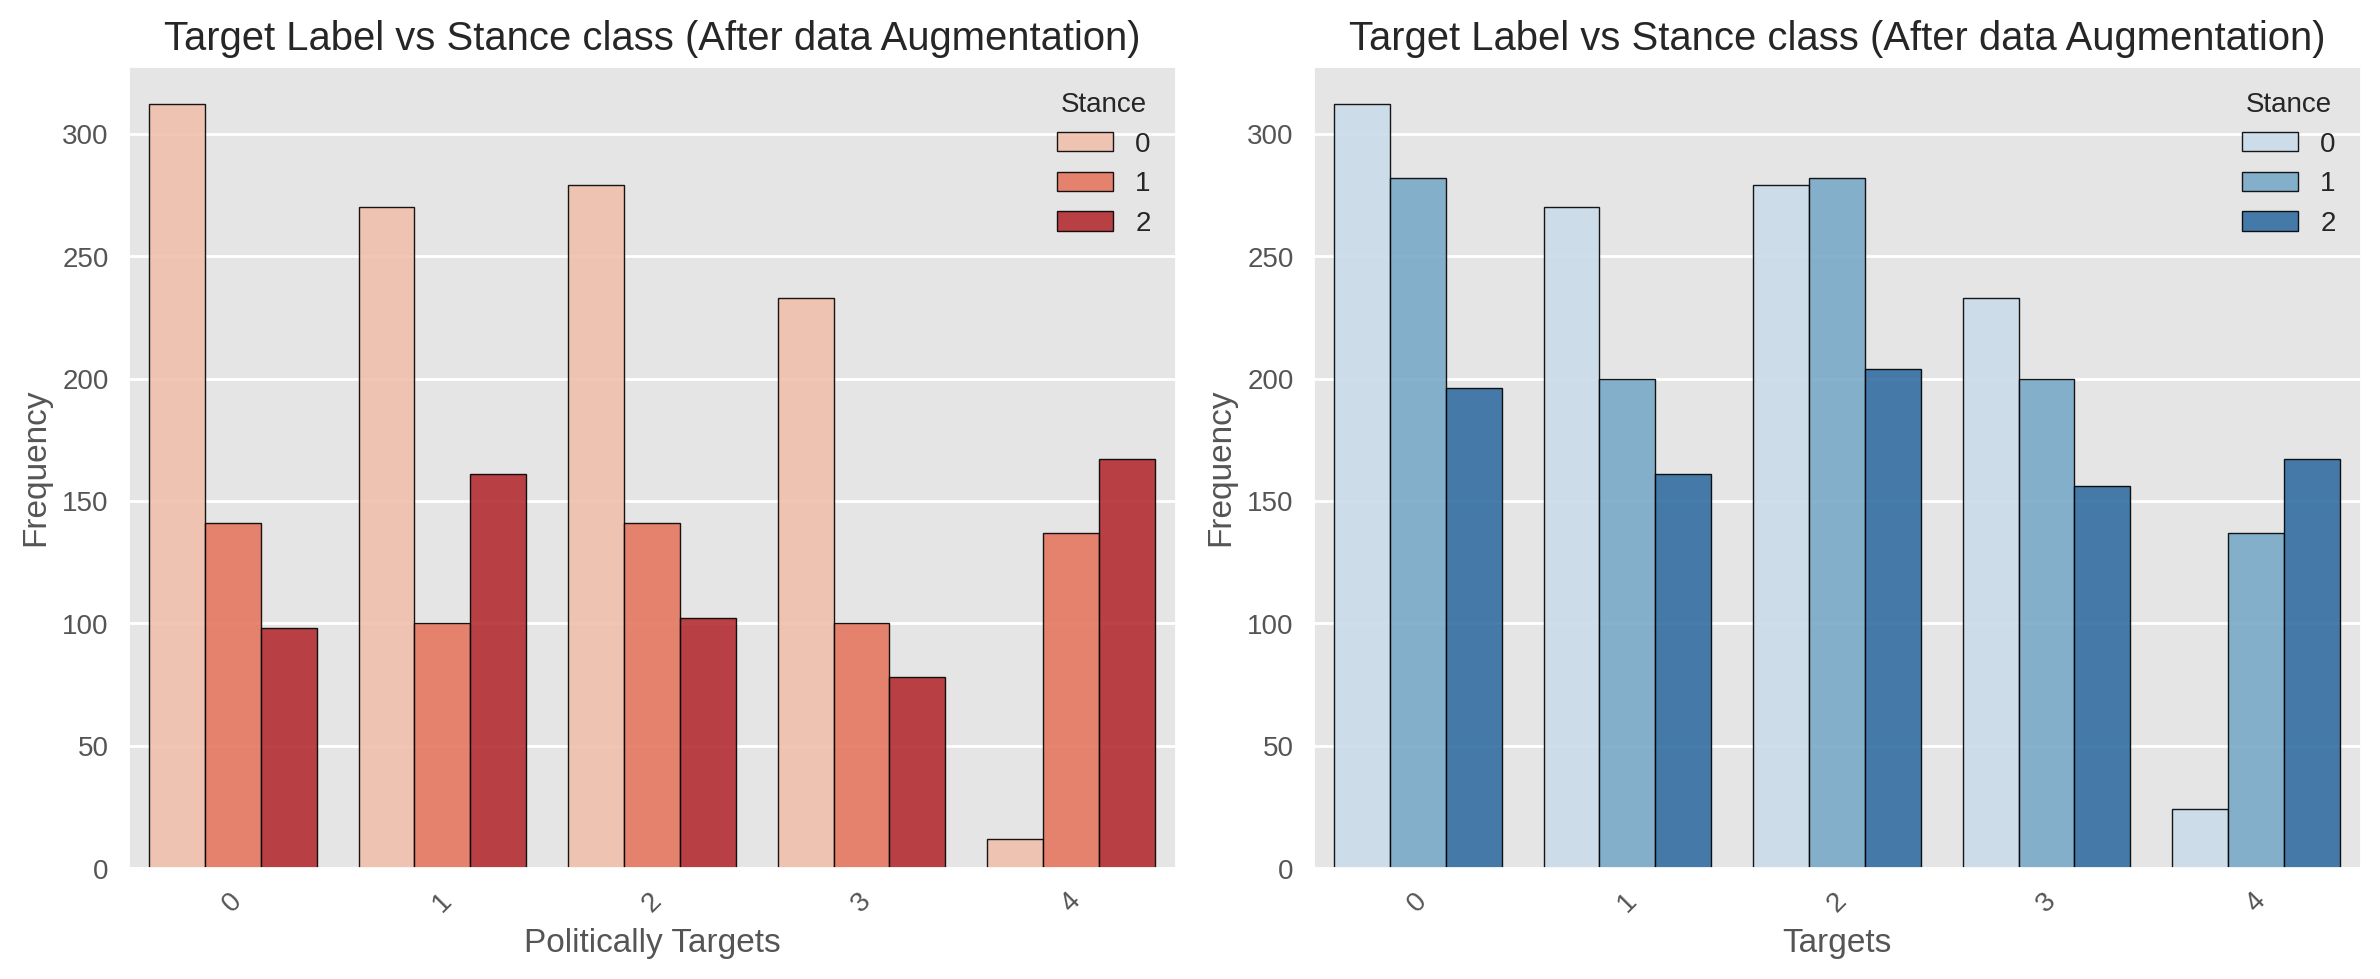

In [ ]:
plt.style.use('ggplot')                                                         # Creating the subplots to see the difference in class distribution
                                                                                # after Data augmentation

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

                                                                                # Plot the first grouped bar graph for before augmentation
sns.countplot(x='Target', hue='Stance', data=train_df, palette='Reds', edgecolor='black', alpha=0.9, ax=axes[0])
axes[0].set_title('Target Label vs Stance class (After data Augmentation)')
axes[0].set_xlabel("Politically Targets")
axes[0].set_ylabel('Frequency')
axes[0].tick_params(axis='x', rotation=45)
                                                                                # Augmentated data for the second subplot

sns.countplot(x='Target', hue='Stance', data=shuffled_df, palette='Blues', edgecolor='black', alpha=0.9, ax=axes[1])
axes[1].set_title('Target Label vs Stance class (After data Augmentation)')
axes[1].set_xlabel("Targets")
axes[1].set_ylabel('Frequency')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()

                                                                                # Show the plot
plt.show()

Combining the new training tweet data and validation Data for creating word index and new numeric representation of tweets after augmentation

In [ ]:
                                                                                # Combine the training and validation data to
val_tweet = val_df["cleaned_tweets"].to_list()                                  # Creating The word index and tweet padding
aug_tweet = shuffled_df["cleaned_tweets"].to_list()

In [ ]:
shuffled_df

Target  Stance                                     cleaned_tweets  \
0          1       0  [feminism, appeared, ray, rice, domestic, viol...   
1          0       0                                  [voting, hillary]   
2          4       2            [simply, rain, houston, anymore, storm]   
3          2       0  [equal, pay, equal, work, yes, freedom, fear, ...   
4          1       1  [daddy, mind, crack, advice, outcome, similar,...   
...      ...     ...                                                ...   
3098       1       1                    [understanding, stop, entering]   
3099       0       1  [ya, go, teddy, boy, world, getting, hotter, c...   
3100       0       0  [pundit, say, jim, webb, facing, uphill, battl...   
3101       0       0  [qualified, eats, snack, corruption, big, fat,...   
3102       2       1  [word, meant, trigger, strong, emotional, resp...   

                                        augmented_tweet  
0     [women's liberation movement, appear, beam of ...  
1                              [ballot, edmund hillary]  
2     [but, rainfall, samuel houston, any longer, te...  
3     [adequate, earnings, adequate, piece of work, ...  
4     [p.a. system, legal opinion, offering, advice,...  
...                                                 ...  
3098                     [understanding, kibosh, entry]  
3099  [ya, hold out, slip, male child, populace, pay...  
3100  [learned person, enounce, jim, martha beatrice...  
3101  [stipulate, chow, collation, putrefaction, ful...  
3102  [christian bible, meant, gun trigger, impregna...  

[3103 rows x 4 columns]

In [ ]:
total_tweets = aug_tweet+val_tweet                                              # Combining the tweets of val and training data

In [ ]:
AO_word_index,AO_vocab_size,AO_tweets_pad =indexing_padding(total_tweets)               #

unique tokens of tweets - 7535
vocab_size of tweets - 7536


In [ ]:
len(AO_word_index)

7535

After combining the validation and new training data we just performing the word indexing and after that converting numeric representation of text according to the word index so there is no suffling that's why we are doing this sub listing according to specific number because after data augmentation and concat that data to the training data the size of training data is 3103

In [ ]:
val_tweet = AO_tweets_pad[3103:]                                                   # creating the validation list after see the size of training data


In [ ]:
training_tweet = AO_tweets_pad[0:3103]                                             # Creating training data

In [ ]:
aug_target_cateogory = shuffled_df["Target"].values
aug_stance_cateogory = shuffled_df["Stance"].values                             # Doing one hot encoding for training stance and target variable

target_values = np.max(aug_target_cateogory) + 1

target_train = np.eye(target_values)[aug_target_cateogory]

stance_values = np.max(aug_stance_cateogory) + 1

Y_train = np.eye(stance_values)[aug_stance_cateogory]


In [ ]:
training_tweet

array([[  37, 3511, 3512, ...,    0,    0,    0],
       [ 279,    7,    0, ...,    0,    0,    0],
       [ 937,  564, 3515, ...,    0,    0,    0],
       ...,
       [6924,   23, 6925, ...,    0,    0,    0],
       [1043, 6928, 6929, ...,    0,    0,    0],
       [ 100, 1087, 2775, ...,    0,    0,    0]], dtype=int32)

In [ ]:
print('Shape of X_train:', training_tweet.shape)
print('Shape of target_train:', target_train.shape)                             # Printing the shape of training and validation data set
print('Shape of Y_train:', Y_train.shape,"\n")


print('Shape of X_train_val:', val_tweet.shape)
print('Shape of target_train_val:', target_val.shape)
print('Shape of Y_train_val:', Y_val.shape)

Shape of X_train: (3103, 45)
Shape of target_train: (3103, 5)
Shape of Y_train: (3103, 3) 

Shape of X_train_val: (583, 45)
Shape of target_train_val: (583, 5)
Shape of Y_train_val: (583, 3)


In [ ]:
AO_E_T = np.zeros((len(AO_word_index) + 1, embedding_dim))                            # Extracting word embadding representation
for word, i in AO_word_index.items():
    embedding_vector = glove_vectors.get(word)                                  # By using word index dictionary of the tweet vocabilary
    if embedding_vector is not None:
        AO_E_T[i] = embedding_vector                                               # Storing the extracted word embaddings

In [ ]:
aug_model = model(tweet_input_shape, target_input_shape, num_stance_classes,AO_word_index,AO_E_T)    # Creating Model instance to training the data again

In [ ]:
l1_strength = 0.001
for layer in aug_model.layers:
    if hasattr(layer, 'kernel_regularizer'):
                                                                                # Apply l1 regularization to the layer's kernel weights
        layer.kernel_regularizer = l1(l1 = l1_strength)

In [ ]:
learning_rate = 0.0001                                                          # Set the learning rate for the Adam optimizer
optimizer = Adam(learning_rate=learning_rate)

In [ ]:
aug_model.compile(optimizer=optimizer, loss='categorical_crossentropy',  metrics= ['categorical_accuracy', f1_Score])

In [ ]:
m_histories['aug'] = aug_model.fit(
    [training_tweet, target_train],                                             # Input data: tweets and target
    Y_train,                                                                    # Target data: stance labels
    epochs=100,
    batch_size=32,
    validation_data=([val_tweet, target_val], Y_val),
    callbacks=get_callbacks('models/aug'),
    verbose=1)

Epoch 1/100
97/97 [==============================] - 32s 232ms/step - loss: 1.0813 - categorical_accuracy: 0.3948 - f1_Score: 0.0188 - val_loss: 1.0379 - val_categorical_accuracy: 0.5009 - val_f1_Score: 0.0000e+00
Epoch 2/100
97/97 [==============================] - 21s 216ms/step - loss: 1.0345 - categorical_accuracy: 0.4844 - f1_Score: 0.1813 - val_loss: 1.0238 - val_categorical_accuracy: 0.5026 - val_f1_Score: 0.4009
Epoch 3/100
97/97 [==============================] - 23s 235ms/step - loss: 0.9916 - categorical_accuracy: 0.5279 - f1_Score: 0.3841 - val_loss: 1.0100 - val_categorical_accuracy: 0.4974 - val_f1_Score: 0.3941
Epoch 4/100
97/97 [==============================] - 20s 209ms/step - loss: 0.9740 - categorical_accuracy: 0.5340 - f1_Score: 0.4185 - val_loss: 0.9856 - val_categorical_accuracy: 0.5060 - val_f1_Score: 0.4368
Epoch 5/100
97/97 [==============================] - 23s 234ms/step - loss: 0.9743 - categorical_accuracy: 0.5411 - f1_Score: 0.4073 - val_loss: 0.9896 - va

**TL_train,TL_val**: The Model is trained without regularization only GloVe Word Embaddings

**TL_reg_train,TL_reg_Val**: The Model is trained with regularization techniques

**TL_OV_train,TL_OV_val**: In this part we are oversampling the stance and training the model with regualization

**all_aug_train,all_aug_val**: In this Model Training we are doing data augmentation on all the tweets

**aug_train,aug_val**:Here we are doing data augmentation only for minority class and adding in the training data

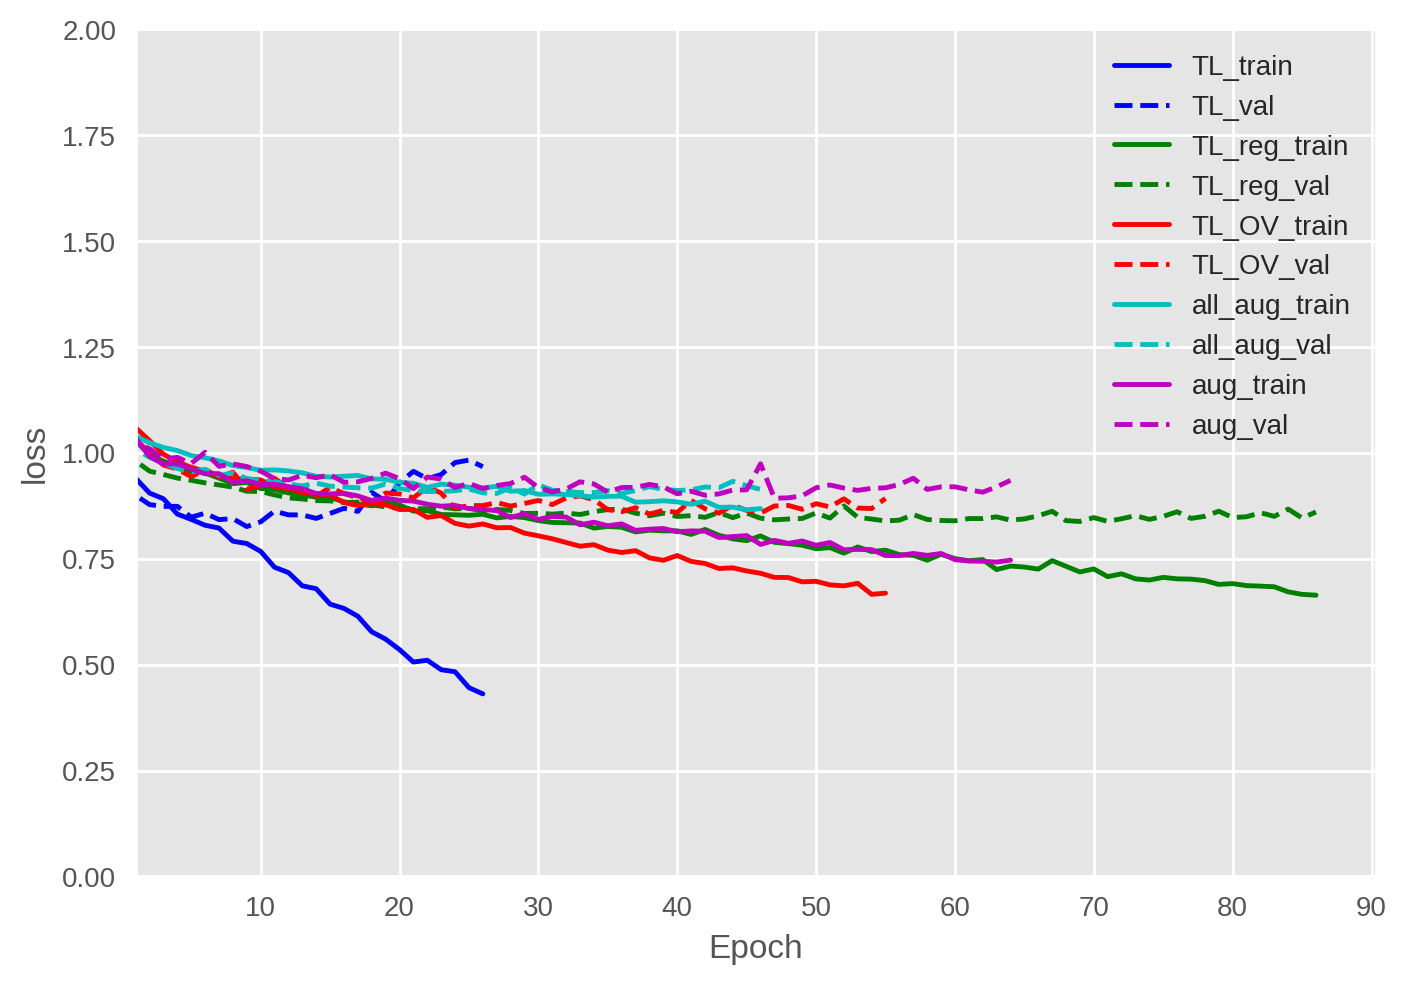

In [ ]:
plotter(m_histories, ylim=[0.0, 2.0], metric = 'loss')                          # Ploting the learning curve with the help of plotter function

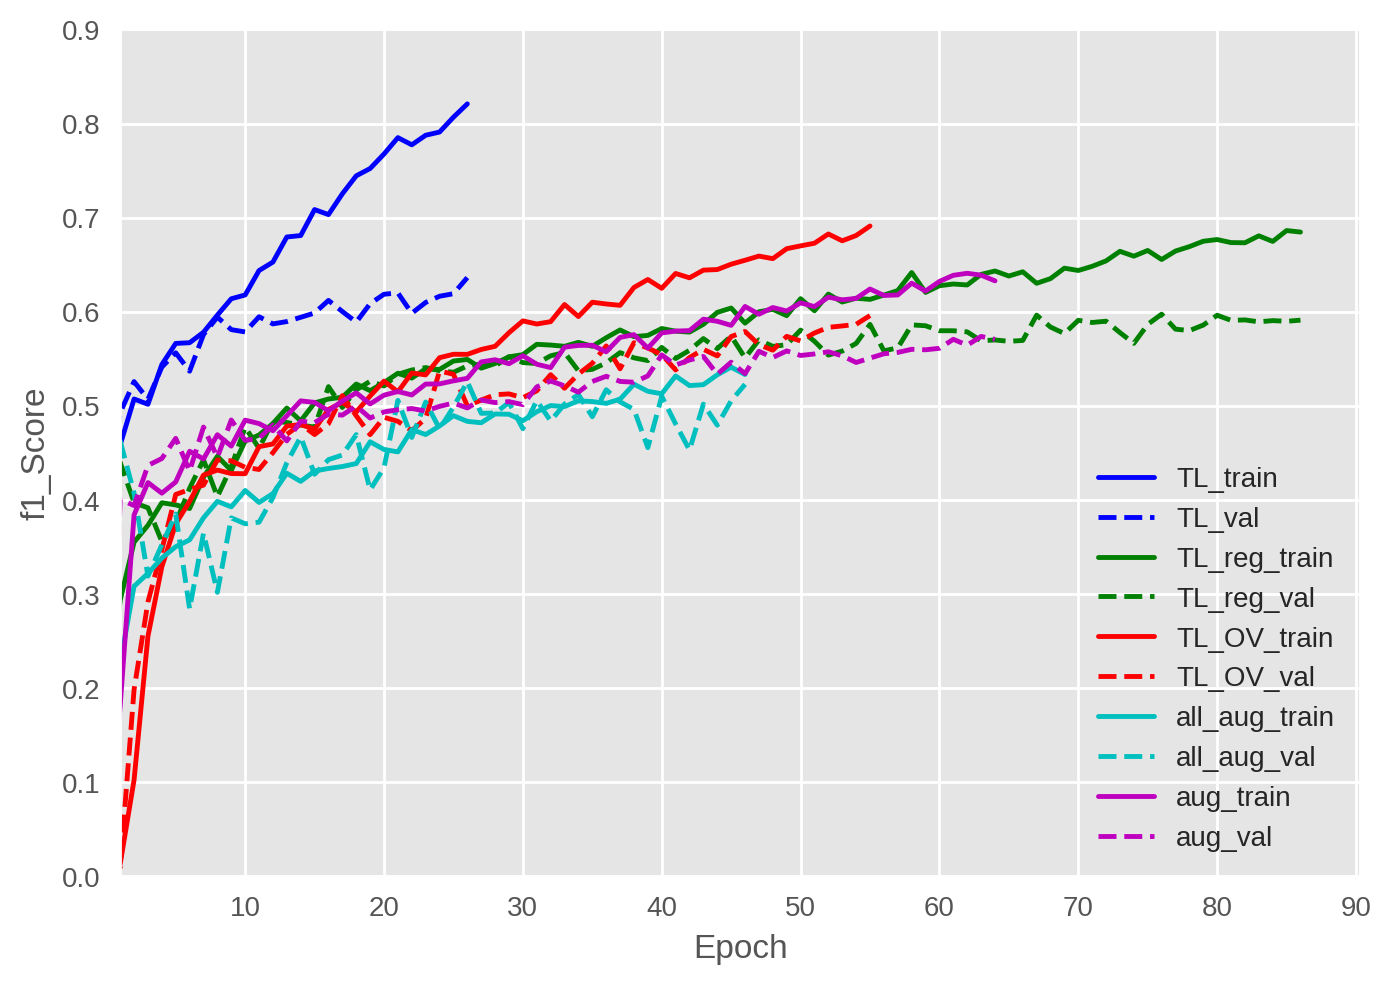

In [ ]:
plotter(m_histories, ylim=[0.0, .9], metric = 'f1_Score')                       # Ploting the learning curve with the help of plotter function

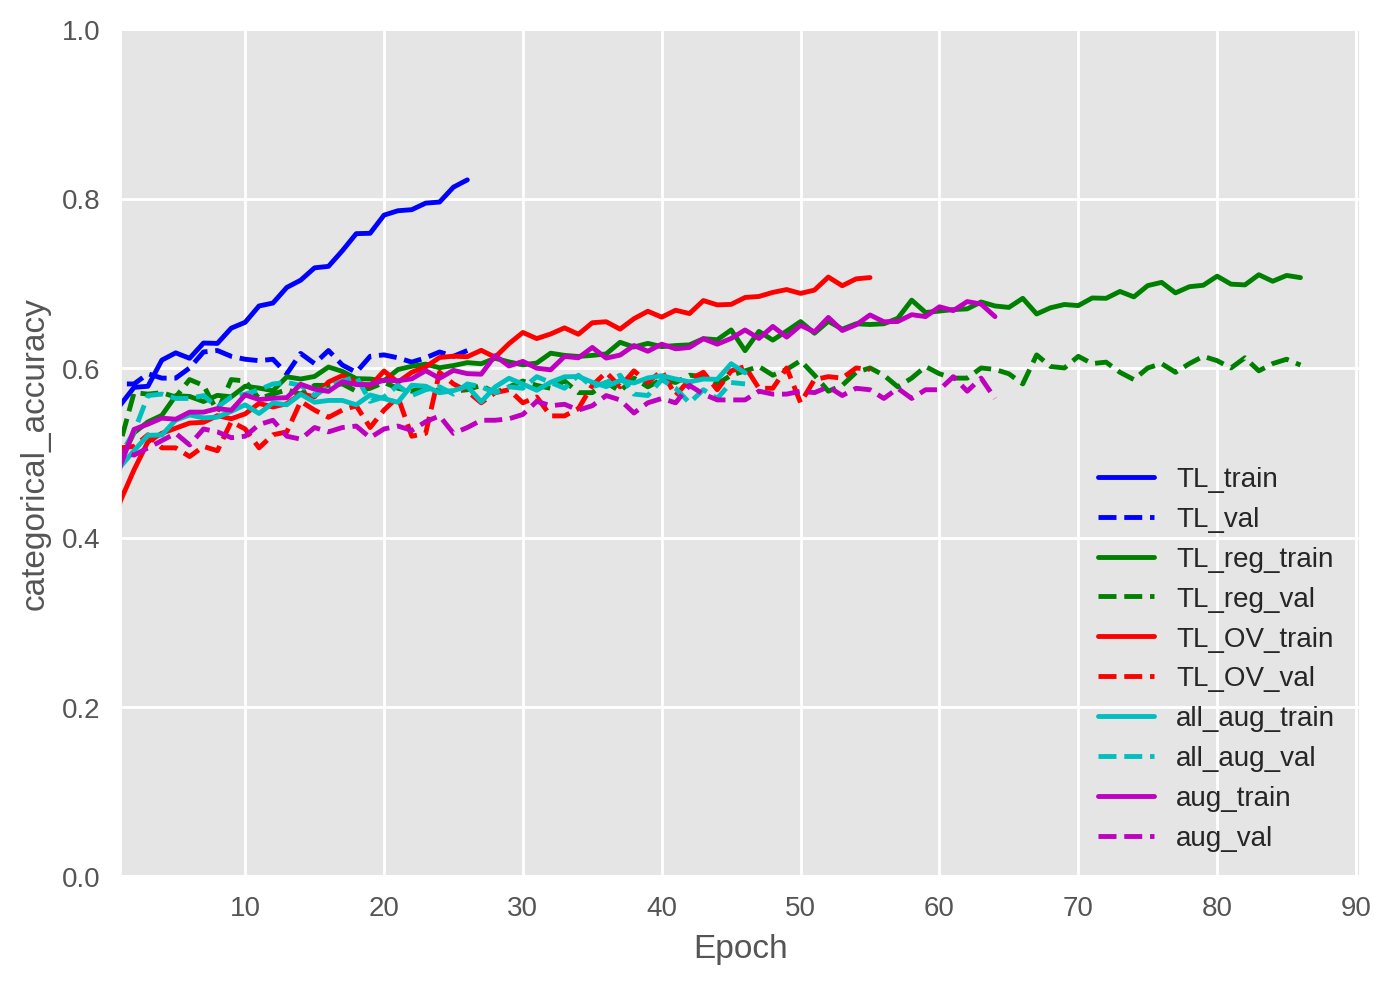

In [ ]:
plotter(m_histories, ylim=[0.0, 1.0], metric = 'categorical_accuracy')          # Ploting the learning curve with the help of plotter function

In [ ]:
all_aug_model.save("all_aug_model")

In [ ]:
model_TL.save("model_TL")

In [ ]:
model_OS_TL.save("model_OS_TL")

In [ ]:
reg_model.save("reg_model")

In [ ]:
aug_model.save("aug_model")

# Testing the Model on test Data

In [ ]:
t_test = t_test[t_test["Target"]!="Donald Trump"]

In [ ]:
test_tweet = t_test["Tweet"].to_list()

In [ ]:

test_tweet = t_test["Tweet"].to_list()
test_tweet = pre_processing(test_tweet)

In [ ]:
def map_tokens_to_indices(tokens, word_index):
    return [word_index[token] for token in tokens if token in word_index]

# Map test tokens to indices while ignoring OOV words
test_data_indices = [map_tokens_to_indices(tokens, TL_word_index) for tokens in test_tweet]

In [ ]:
tweets_pad = pad_sequences(test_data_indices, maxlen=tweet_max_length, padding='post')

In [ ]:
stance_mapping = {                                                              #Creating a dictionary to convert Stance into numerical values
    'AGAINST':0,
    "NONE":1,
    "FAVOR":2
}
t_test["Stance"] = t_test["Stance"].map(stance_mapping)                         # Performing mapping on Stance column

In [ ]:
target_mapping = {                                                              # Creating a dictionary to convert target into numerical values

    'Hillary Clinton': 0,
    'Feminist Movement': 1,
    'Legalization of Abortion': 2,
    'Atheism': 3,
    'Climate Change is a Real Concern': 4
}
t_test["Target"] = t_test["Target"].map(target_mapping)

In [ ]:
test_target_cateogory = t_test["Target"].values

target_values = np.max(test_target_cateogory) + 1

target_t_test = np.eye(target_values)[test_target_cateogory]

test_stance_cateogory = t_test["Stance"].values

stance_values = np.max(test_stance_cateogory) + 1

stance_t_test = np.eye(stance_values)[test_stance_cateogory]

# Prediction on Test Data
Here we are evaluating the performance of Model by printing classification report, confusion Metrics and  Macro-Averaging Metrics

In [ ]:
test_loss, test_categorical_accuracy, test_f1_score = reg_model.evaluate([tweets_pad, target_t_test], stance_t_test)

40/40 [==============================] - 1s 18ms/step - loss: 0.8298 - categorical_accuracy: 0.6221 - f1_Score: 0.5651


In [ ]:
predictions = reg_model.predict([tweets_pad, target_t_test])

40/40 [==============================] - 2s 28ms/step


In [ ]:
predicted_labels = np.argmax(predictions, axis=1)

In [ ]:
Stance = ["AGAINST", "NONE", "FAVOUR"]
actual_values = t_test["Stance"].to_list()

In [ ]:
numeric_labels = predicted_labels.tolist()

In [ ]:
numeric_labels = predicted_labels.tolist()
from sklearn.metrics import classification_report,accuracy_score
Stance_class = classification_report(actual_values,                # making the classification report of Emotion Class
                                       numeric_labels,
                                       target_names=Stance)

Classification Report of the test Data Evaluation

In [ ]:
print(Stance_class)

              precision    recall  f1-score   support

     AGAINST       0.72      0.76      0.74       715
        NONE       0.37      0.41      0.39       230
      FAVOUR       0.60      0.45      0.51       304

    accuracy                           0.62      1249
   macro avg       0.56      0.54      0.55      1249
weighted avg       0.62      0.62      0.62      1249



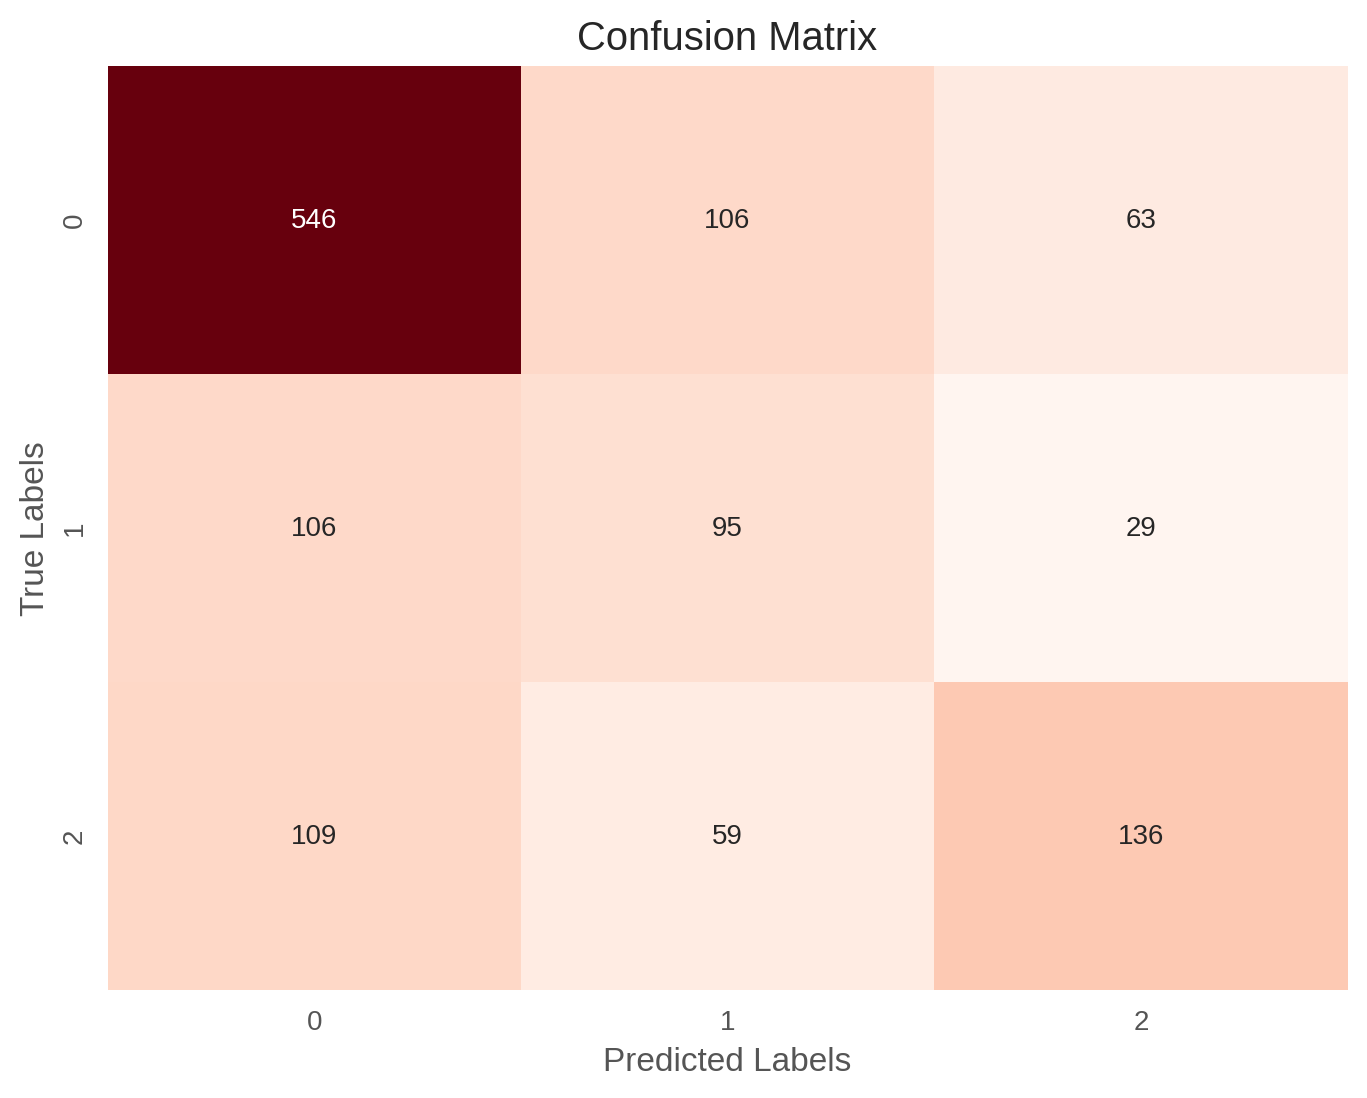

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
                                                                                # Calculate the confusion matrix using true_emotion_labels
                                                                                # and predicted_emotion_labels
con_matrix = confusion_matrix(actual_values, numeric_labels)
                                                                                # heapmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(con_matrix, annot=True, fmt='d', cmap='Reds', cbar=False)
plt.title("Confusion Matrix")                                                   # Set the title of the plot
plt.xlabel("Predicted Labels")                                                  # Label for the x-axis
plt.ylabel("True Labels")                                                       # Label for the y-axis
plt.show()                                                                      # Display the heatmap

In [ ]:
from sklearn.metrics import precision_recall_fscore_support
print("=" * 80)
                                                                                # Compute Macro-Averaging metrics

macro_metrics = precision_recall_fscore_support(actual_values, numeric_labels,
                                    average='macro')
macro_precision, macro_recall, macro_f1, _ = macro_metrics

print("Macro-Averaging Metrics:\n")
print(f"Macro-Precision: {macro_precision:.2f}")
print(f"Macro-Recall: {macro_recall:.2f}")
print(f"Macro-F1: {macro_f1:.2f}")
print("=" * 80)

Macro-Averaging Metrics:

Macro-Precision: 0.56
Macro-Recall: 0.54
Macro-F1: 0.55


# Comparsion between actual and predicted values


In [ ]:
t_test["predicted_value"] = numeric_labels

In [ ]:
stance_mapping = {
    0: 'AGAINST',
    1: 'NONE',
    2: 'FAVOR'
}
t_test["predicted_value"] = t_test["predicted_value"].map(stance_mapping)

In [ ]:
t_test["Stance"] = t_test["Stance"].map(stance_mapping)

In [ ]:
target_mapping = {

    0:'Hillary Clinton',
    1:'Feminist Movement',
    2:'Legalization of Abortion',
    3:'Atheism',
    4:'Climate Change is a Real Concern'
}

In [ ]:
t_test["Target"] = t_test["Target"].map(target_mapping)

In [ ]:
random_samples = t_test.sample(8)

In [ ]:
tweets = random_samples["Tweet"].tolist()
targets = random_samples["Target"].tolist()
Stances = random_samples["Stance"].tolist()
predicted_stances = random_samples["predicted_value"].tolist()

In [ ]:
for i in range(len(tweets)):
    print("Tweet:\t",tweets[i],"\n", "Target:\t\t", targets[i],"\n","Actual Stance:\t\t",Stances[i],"\n"\
          "Predicted Stance:\t", predicted_stances[i],"\n")
    print("#"*80)

Tweet:	 Tomorrow, we gone see think pieces on @KeyAndPeele 's pirate skit. #wesayyoho #butwedontsayho #cuzhoisdisrespectfulyo #kinda #SemST 
 Target:		 Feminist Movement 
 Actual Stance:		 NONE 
Predicted Stance:	 NONE 

################################################################################
Tweet:	 I'm a co-omnipotent-faux-fallacious-poly-concupiscent-inter-equanimity feminist now.   you may bow to me. #SemST 
 Target:		 Feminist Movement 
 Actual Stance:		 AGAINST 
Predicted Stance:	 AGAINST 

################################################################################
Tweet:	 Actually on second thoughts, it's pretty bloody terrifying #climatecrisis #ISS15 #SemST 
 Target:		 Climate Change is a Real Concern 
 Actual Stance:		 FAVOR 
Predicted Stance:	 NONE 

################################################################################
Tweet:	 @angerelle you disagree that people should strive to be stronger? #empowering #SemST 
 Target:		 Feminist Movement 
 Actual Sta

# Model Testing On New Unseen Data

In [ ]:
# Loading Our own test data
test_data = pd.read_csv("tweets_and_stances.csv")

In [ ]:
test_data.head(5)

Tweet  \
0  I firmly believe that abortion is morally wron...   
1  The legalization of abortion contradicts the s...   
2  I'm against the legalization of abortion becau...   
3  Legalization of abortion empowers women to mak...   
4  Supporting the legalization of abortion ensure...   

                     Target   Stance  
0  Legalization of Abortion  AGAINST  
1  Legalization of Abortion  AGAINST  
2  Legalization of Abortion  AGAINST  
3  Legalization of Abortion    FAVOR  
4  Legalization of Abortion    FAVOR

In [ ]:
test_tweet = test_data["Tweet"].to_list()
test_tweet = pre_processing(test_tweet)

In [ ]:
# Map test tokens to indices while ignoring OOV words
def map_tokens_to_indices(tokens, word_index):
    return [word_index[token] for token in tokens if token in word_index]

# Map test tokens to indices while ignoring OOV words
test_data_indices = [map_tokens_to_indices(tokens, TL_word_index) for tokens in test_tweet]

In [ ]:
tweets_pad = pad_sequences(test_data_indices, maxlen=tweet_max_length, padding='post')

In [ ]:
stance_mapping = {                                                              #Creating a dictionary to convert Stance into numerical values
    'AGAINST':0,
    "NONE":1,
    "FAVOR":2
}
target_mapping = {                                                              # Creating a dictionary to convert target into numerical values

    'Hillary Clinton': 0,
    'Feminist Movement': 1,
    'Legalization of Abortion': 2,
    'Atheism': 3,
    'Climate Change is a Real Concern': 4
}

test_data["Stance"] = test_data["Stance"].map(stance_mapping)
test_data["Target"] = test_data["Target"].map(target_mapping)

In [ ]:
test_target_cateogory = test_data["Target"].values

target_values = np.max(test_target_cateogory) + 1

target_t_test = np.eye(target_values)[test_target_cateogory]

test_stance_cateogory = test_data["Stance"].values

stance_values = np.max(test_stance_cateogory) + 1

stance_t_test = np.eye(stance_values)[test_stance_cateogory]

In [ ]:
predictions = reg_model.predict([tweets_pad, target_t_test])

2/2 [==============================] - 0s 17ms/step


In [ ]:
predicted_labels = np.argmax(predictions, axis=1)
Stance = ["AGAINST", "NONE", "FAVOUR"]
actual_values = test_data["Stance"].to_list()

In [ ]:
numeric_labels = predicted_labels.tolist()
from sklearn.metrics import classification_report,accuracy_score
Stance_class = classification_report(actual_values,                # making the classification report of Emotion Class
                                       numeric_labels,
                                       target_names=Stance)

In [ ]:
print(Stance_class)

              precision    recall  f1-score   support

     AGAINST       0.39      0.67      0.49        18
        NONE       0.71      0.29      0.42        17
      FAVOUR       0.27      0.22      0.24        18

    accuracy                           0.40        53
   macro avg       0.46      0.39      0.38        53
weighted avg       0.45      0.40      0.38        53



In [ ]:
from sklearn.metrics import precision_recall_fscore_support
print("=" * 80)
                                                                                # Compute Macro-Averaging metrics

macro_metrics = precision_recall_fscore_support(actual_values, numeric_labels,
                                    average='macro')
macro_precision, macro_recall, macro_f1, _ = macro_metrics

print("Macro-Averaging Metrics:\n")
print(f"Macro-Precision: {macro_precision:.2f}")
print(f"Macro-Recall: {macro_recall:.2f}")
print(f"Macro-F1: {macro_f1:.2f}")
print("=" * 80)

Macro-Averaging Metrics:

Macro-Precision: 0.46
Macro-Recall: 0.39
Macro-F1: 0.38
